# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [ ]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 38.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Importing the necessary libraries

In [50]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [51]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# Import the first file - True.csv
data_true=pd.read_csv('/content/drive/MyDrive/True.csv')
# Import the second file - Fake.csv
data_fake=pd.read_csv('/content/drive/MyDrive/Fake.csv')



## **1.** Data Preparation  <font color = red>[10 marks]</font>





In [54]:
data_fake.head()

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.","December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former

In [55]:
data_true.tail()

,title,text,date
21412,'Fully committed' NATO backs new U.S. approach on Afghanistan,"BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against Taliban insurgents, saying: Our troops will fight to win . U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an extraordinary sacrifice of blood and treasure . We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they will, Trump said. That comment signaled he would further increase pressure on U.S. partners who have already been jolted by his repeated demands to step up their contributions to NATO and his description of the alliance as obsolete - even though, since taking office, he has said this is no longer the case. NATO Secretary General Jens Stoltenberg said in a statement: NATO remains fully committed to Afghanistan and I am looking forward to discussing the way ahead with (Defense) Secretary (James) Mattis and our Allies and international partners. NATO has 12,000 troops in Afghanistan, and 15 countries have pledged more, Stoltenberg said. Britain, a leading NATO member, called the U.S. commitment very welcome . In my call with Secretary Mattis yesterday we agreed that despite the challenges, we have to stay the course in Afghanistan to help build up its fragile democracy and reduce the terrorist threat to the West, Defence Secretary Michael Fallon said. Germany, which has borne the brunt of Trump s criticism over the scale of its defense spending, also welcomed the new U.S. plan. Our continued commitment is necessary on the path to stabilizing the country, a government spokeswoman said. In June, European allies had already pledged more troops but had not given details on numbers, waiting for the Trump administration to outline its strategy for the region.Nearly 16 years after the U.S.-led invasion - a response to the Sept. 11 attacks which were planned by al Qaeda leader Osama bin Laden from Afghanistan - the country is still struggling with weak central government and a Taliban insurgency. Trump said he shared the frustration of the American people who were weary of war without victory , but a hasty withdrawal would create a vacuum for groups like Islamic State and al Qaeda to fill.","August 22, 2017"
21413,LexisNexis withdrew two products from Chinese market,"LONDON (Reuters) - LexisNexis, a provider of legal, regulatory and business information, said on Tuesday it had withdrawn two products from the Chinese market in March this year after it was asked to remove some content. The issue of academic freedom in China hit the headlines this week after the leading British academic publisher, Cambridge University Press, said it had complied with a request to block online access to some scholarly articles in China. It later reversed its position. Earlier this year LexisNexis Business Insight Solutions in China was asked to remove some content from its database, LexisNexis said in a statement. In March 2017, the company withdrew two products (Nexis and LexisNexis Academic) from the Chinese market. LexisNexis is owned by information group Relx.","August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,"MINSK (Reuters) - In the shadow of disused Soviet-era factories in Minsk, a street lined with eclectic bars, art galleries and yoga studios has become a haven from 

In [56]:
#Add new column news_label to both the DataFrames and assign labels
data_fake["news_label"]=0
data_true['news_label']=1

In [57]:
data_fake.shape, data_true.shape

((23523, 4), (21417, 4))

In [58]:
#preparing test data
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis = 0, inplace = True)


data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis = 0, inplace = True)

### **1.0** Data Understanding

In [59]:
data_fake_manual_testing['news_label']=0
data_true_manual_testing['news_label']=1


In [60]:
data_fake_manual_testing.head(10)

title  \
23513                     Seven Iranians freed in the prisoner swap have not returned to Iran   
23514                                                           #Hashtag Hell & The Fake Left   
23515  Astroturfing: Journalist Reveals Brainwashing Tactic Uses to Manipulate Public Opinion   
23516                                               The New American Century: An Era of Fraud   
23517                          Hillary Clinton: ‘Israel First’ (and no peace for Middle East)   
23518                           McPain: John McCain Furious That Iran Treated US Sailors Well   
23519       JUSTICE? Yahoo Settles E-mail Privacy Class-action: $4M for Lawyers, $0 for Users   
23520   Sunnistan: US and Allied ‘Safe Zone’ Plan to Take Territorial Booty in Northern Syria   
23521                     How to Blow $700 Million: Al Jazeera America Finally Calls it Quits   
23522       10 U.S. Navy Sailors Held by Iranian Military – Signs of a Neocon Political Stunt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [61]:
data_true_manual_testing.head(10)

title  \
21407                       Mata Pires, owner of embattled Brazil builder OAS, dies   
21408                    U.S., North Korea clash at U.N. forum over nuclear weapons   
21409                  U.S., North Korea clash at U.N. arms forum on nuclear threat   
21410            Headless torso could belong to submarine journalist: Danish police   
21411  North Korea shipments to Syria chemical arms agency intercepted: U.N. report   
21412                 'Fully committed' NATO backs new U.S. approach on Afghanistan   
21413                          LexisNexis withdrew two products from Chinese market   
21414                             Minsk cultural hub becomes haven from authorities   
21415                 Vatican upbeat on possibility of Pope Francis visiting Russia   
21416                          Indonesia to buy $1.14 billion worth of Russian jets   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [62]:
#Concatenating data_fake and data_true into data_merge creates a single, unified dataset containing all labeled examples
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,date,news_label
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.","December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before th

In [63]:
#merging the columns
data_merge['news_text'] = data_merge['title'].fillna('') + ' ' + data_merge['text'].fillna('')
data_merge.head(10)

,title,text,date,news_label,news_text
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.","December 31, 2017",0,"Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting 

In [64]:
# Display the first 5 rows of the combined DataFrame to verify the result
data_merge.head(5)

,title,text,date,news_label,news_text
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.","December 31, 2017",0,"Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting 

In [65]:
# "title" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.
data=data_merge.drop(['title','date'], axis = 1)

In [66]:
# Display the first 5 rows of the combined DataFrame to verify the result
data.head(5)

,text,news_label,news_text
0,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",0,"Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [67]:
# Check Presence of Null Values

data.isnull().sum()

,0
text,21
news_label,0
news_text,0


In [68]:
# Get the number of rows before handling null values
initial_rows = data.shape[0]

In [69]:
# Drop rows that contain any null values
data.dropna(axis=0, inplace=True)

In [70]:
# Get the number of rows after handling null values
rows_after_drop = data.shape[0]
print(f"Number of rows after dropping rows with null values: {rows_after_drop}")
print(f"Number of rows dropped: {initial_rows - rows_after_drop}")

Number of rows after dropping rows with null values: 44899
Number of rows dropped: 21


In [71]:
# Verify that there are no more null values
print("\nChecking for null values after dropping:")
print(data.isnull().sum())


Checking for null values after dropping:
text          0
news_label    0
news_text     0
dtype: int64


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [72]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed

# Add 'news_label' column to the new dataframe for topic identification
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed

# Add 'news_label' column to the new dataframe for topic identification
# 1. Text Cleaning
# Download necessary NLTK data
# 1. Text Cleaning
# Download necessary NLTK data
import re
import string
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import os  # Import the os module

# Define the path where you want to download the NLTK data
nltk_data_path = os.path.expanduser("~/.nltk_data")  # Or another suitable path
os.makedirs(nltk_data_path, exist_ok=True)  # Create the directory if it doesn't exist

# Set the NLTK data path to the new location
nltk.data.path.append(nltk_data_path)

# Download the required resource: 'averaged_perceptron_tagger' and 'averaged_perceptron_tagger_eng'
nltk.download('averaged_perceptron_tagger', download_dir=nltk_data_path)
nltk.download('averaged_perceptron_tagger_eng', download_dir=nltk_data_path) # Download the 'eng' resource

try:
    # Download 'wordnet', 'averaged_perceptron_tagger' if not already present
    nltk.download('wordnet', quiet=True, download_dir=nltk_data_path)

except LookupError:
    print("Error: Required NLTK data not found. Please install it.")

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    """Map NLTK POS tags to WordNet POS tags"""
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN # Default to noun if tag is not recognized

def wordopt(text):
    text = text.lower() #make the text in lowercase
    text = re.sub('\[.*?\]','',text) # Remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+','',text) # Remove URLs
    text = re.sub('<.*?>+','',text) # Remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text) # Remove punctuation
    text = re.sub('\n',' ',text) # Replace newlines with spaces
    text = re.sub('\w*\d\w*','',text) # Remove words containing numbers
    text = re.sub(r'\s+', ' ', text).strip() # Reduce multiple spaces to single and strip whitespace
    # Tokenization (split into words)
    words = text.split()

    # 2. POS Tagging and 3. Lemmatization
    lemmatized_words = []
    pos_tags = nltk.pos_tag(words)

    for word, tag in pos_tags:
        wntag = get_wordnet_pos(tag)
        lemma = lemmatizer.lemmatize(word, pos=wntag)
        lemmatized_words.append((lemma, tag))

    # 4. Filtering for Nouns (NN and NNS)

    return [word for word, tag in lemmatized_words if tag in ['NN', 'NNS', 'JJ', 'VB']]

def process_news_text_nouns_only(text):
    """
    Cleans news text, performs POS tagging and lemmatization,
    and filters for nouns, returning a list of lemmatized nouns.
    """
    lemmatized_nouns = []  # Create a list to store the results

    # Apply cleaning steps first
    cleaned_text = wordopt(text)  # This is where the issue occurs

    # No need to split since cleaned_text is already a list of words
    # words = cleaned_text.split()  # Remove this line

    # POS Tagging and Lemmatization (use cleaned_text directly)
    if cleaned_text:  # Check if cleaned_text is not empty
        pos_tags = nltk.pos_tag(cleaned_text)

        for word, tag in pos_tags:
            # Filter for Nouns (NN and NNS) before lemmatization for efficiency
            if tag in ['NN', 'NNS', 'JJ', 'VB']:
                wntag = get_wordnet_pos(tag)
                lemma = lemmatizer.lemmatize(word, pos=wntag)
                lemmatized_nouns.append(lemma)

    return lemmatized_nouns  # Return the list of lemmatized nouns

# Instead of creating df from data, create it directly from the original dataframe 'data'
df = data[['news_text', 'news_label']].copy()   # Select the necessary columns

# Create the new DataFrame df_clean
df_clean = pd.DataFrame()

# Add the 'cleaned_text' column
df_clean['cleaned_text'] = df['news_text'].apply(wordopt)

# Add the 'lemmatized_words' column
# This applies the full processing function to get the list of nouns
df_clean['lemmatized_words'] = df['news_text'].apply(process_news_text_nouns_only)

# Add the 'news_label' column from the original DataFrame
df_clean['news_label'] = df['news_label'] # Corrected: Changed 'label' to 'news_label'

# Display the first few rows of the new DataFrame
print(df_clean.head())
df_clean.to_csv("/content/drive/MyDrive/clean_df.csv", index=False)
df_clean = pd.read_csv("/content/drive/MyDrive/clean_df.csv")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/.nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/.nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          cleaned_text  \
0                                                                                                                             

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [24]:
# Write the function here to clean the text and remove all the unnecessary elements

# Convert to lower case

# Remove text in square brackets

# Remove punctuation

# Remove words with numbers
# done above %% [markdown] #### 2.1.2 Apply the function to clean the news text
# and store the cleaned text in a new column within the new DataFrame. <font
# color = red>[1 mark]</font> <br>
#
# %% Apply the function to clean the news text and remove all unnecessary
# elements Store it in a separate column in the new DataFrame

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [25]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
# done above %% [markdown] ### **2.2** POS Tagging and Lemmatization <font color
# = red>[10 marks]</font> <br>
#
# %% [markdown] #### 2.2.1 Write the function for POS tagging and lemmatization,
# filtering stopwords and keeping only NN and NNS tags <font color = red>[8
# marks]</font> <br>
#
# %% Write the function for POS tagging and lemmatization, filtering stopwords
# and keeping only NN and NNS tags

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [26]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
# done above

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [ ]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
#done above

### Save the Cleaned data as a csv file (Recommended)

In [73]:
## Recommended to perform the below steps to save time while rerunning the code

df_clean.to_csv("/content/drive/MyDrive/clean_df.csv", index=False)
df_clean = pd.read_csv("/content/drive/MyDrive/clean_df.csv")

In [74]:
# Check the first few rows of the DataFrame
print(df_clean.head())

In [75]:
# Check the dimensions of the DataFrame
print(df_clean.shape)

(44899, 3)


In [76]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44899 entries, 0 to 44898
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cleaned_text      44899 non-null  object
 1   lemmatized_words  44899 non-null  object
 2   news_label        44899 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [77]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
# Import the function
from sklearn.model_selection import train_test_split

# Assuming your clean DataFrame is named df_clean
# Split the data into 70% training and 30% validation sets
# test_size=0.30 means 30% will be the validation set
# random_state is used for reproducibility - use any integer
train_df, val_df = train_test_split(df_clean, test_size=0.30, random_state=42)

# You can optionally check the shapes to confirm the split
print("Shape of training data:", train_df.shape)
print("Shape of validation data:", val_df.shape)

Shape of training data: (31429, 3)
Shape of validation data: (13470, 3)


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [78]:
# Add a new column to calculate the character length of cleaned news text

train_df['cleaned_text_char_length'] = train_df['cleaned_text'].str.len() # Changed df to train_df

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['lemmatized_text_no_pos_char_length'] = train_df['lemmatized_words'].str.len() # Changed df to train_df

# You can display the head of the DataFrame with the new columns to verify
print(train_df[['cleaned_text', 'cleaned_text_char_length', 'lemmatized_words', 'lemmatized_text_no_pos_char_length']].head()) # Changed df to train_df

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

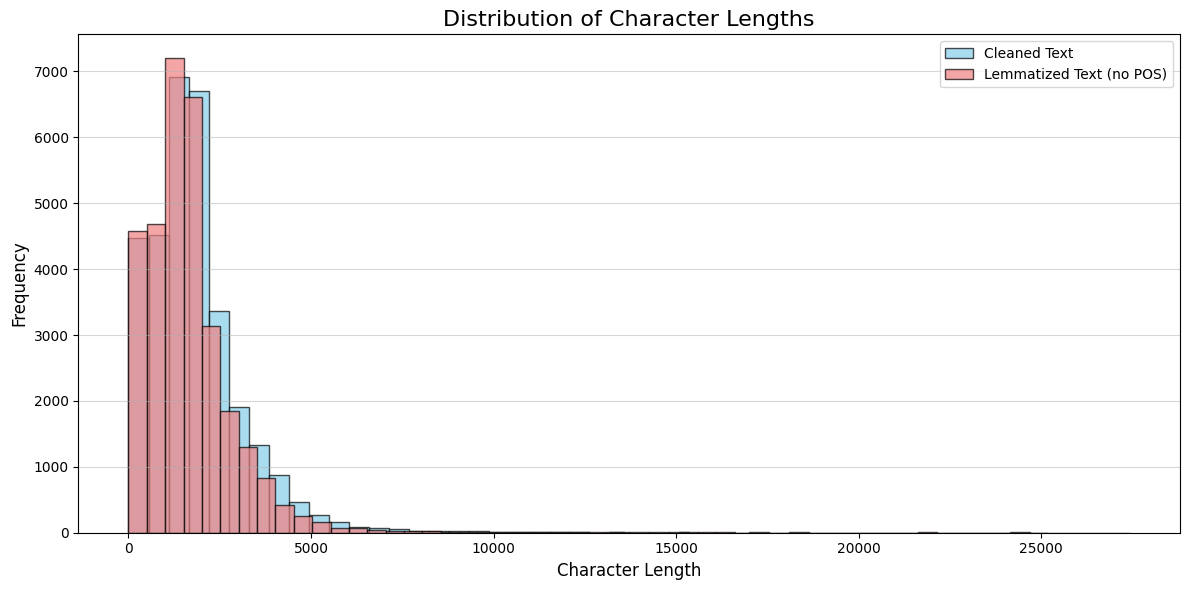

In [79]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named df (replace with the actual name, e.g., train_df or val_df)
# Make sure you have already calculated the character length columns:
train_df['cleaned_text_char_length']
train_df['lemmatized_text_no_pos_char_length']

# --- Create the Histogram Plot ---

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Add histogram for cleaned news text
# Using 'bins' to define the number of bars in the histogram
# 'alpha' controls transparency, useful when plotting multiple histograms
# 'label' is used for the legend
# 'edgecolor' adds a border to the bars
plt.hist(train_df['cleaned_text_char_length'], bins=50, alpha=0.7, label='Cleaned Text', color='skyblue', edgecolor='black')

# Add histogram for lemmatized news text with POS tags removed
plt.hist(train_df['lemmatized_text_no_pos_char_length'], bins=50, alpha=0.7, label='Lemmatized Text (no POS)', color='lightcoral', edgecolor='black')

# Add plot title and labels
plt.title('Distribution of Character Lengths', fontsize=16)
plt.xlabel('Character Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a legend to identify the histograms
plt.legend()

# Add a grid for easier reading along the y-axis
plt.grid(axis='y', alpha=0.5)

# Adjust layout to prevent labels and title from overlapping
plt.tight_layout()

# Show the plot
plt.show()




### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

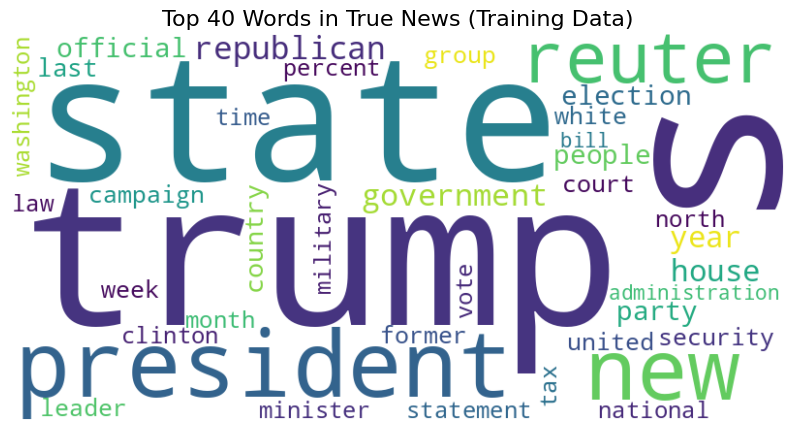

In [80]:
## Use a word cloud to find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import ast  # Import ast to safely evaluate strings as Python literals

# --- Configuration ---
data_df = train_df
processed_text_column = 'lemmatized_words'
label_column = 'news_label'
true_news_label_value = 1
num_top_words = 40

# --- Filter news with the specified label (True News) ---
true_news_df = data_df[data_df[label_column] == true_news_label_value].copy()

# --- Prepare text for Word Cloud ---
# Convert list of words to a single string for each row, handling non-string/null values
all_true_news_text = ""  # Initialize an empty string to store all the text

for index, row in true_news_df.iterrows():
    try:
        # Safely evaluate the string representation of the list of words
        words = ast.literal_eval(row[processed_text_column])
        if isinstance(words, list):  # Check if it's a list of words
            all_true_news_text += " " + " ".join(words)  # Join the words and add to the overall text
    except (SyntaxError, ValueError):
        # Handle cases where the string is not a valid list representation
        pass  # Ignore and continue to the next row

# Remove leading/trailing spaces and check if the text is empty
all_true_news_text = all_true_news_text.strip()

# Check if all_true_news_text is empty and print a message if it is
if not all_true_news_text:
    print("Warning: all_true_news_text is empty. No words found for word cloud.")
else:
    # --- Generate Word Cloud ---
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                        max_words=num_top_words, collocations=False).generate(all_true_news_text)

    # --- Display the Word Cloud ---
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Top {num_top_words} Words in True News (Training Data)', fontsize=16)
    plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

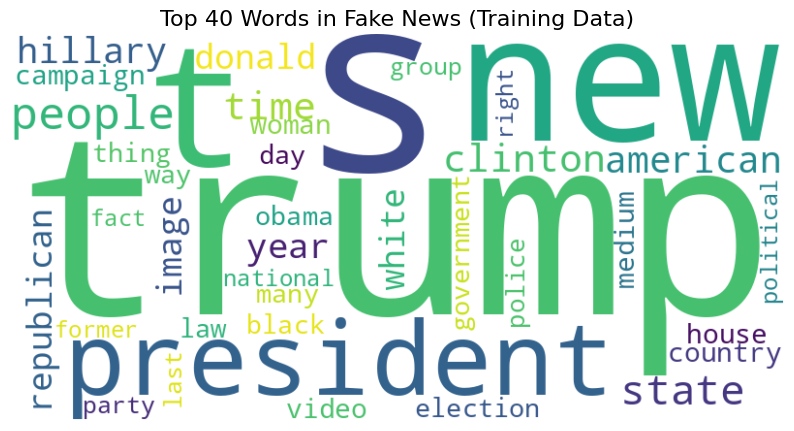

In [81]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

# Generate word cloud for Fake News
i## Use a word cloud to find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import ast  # Import ast to safely evaluate strings as Python literals

# --- Configuration ---
data_df = train_df
processed_text_column = 'lemmatized_words'
label_column = 'news_label'
fake_news_label_value = 0  # Changed to 0 for fake news
num_top_words = 40

# --- Filter news with the specified label (Fake News) ---
fake_news_df = data_df[data_df[label_column] == fake_news_label_value].copy()  # Changed to fake_news_df

# --- Prepare text for Word Cloud ---
# Convert list of words to a single string for each row, handling non-string/null values
all_fake_news_text = ""  # Initialize an empty string to store all the text

for index, row in fake_news_df.iterrows():  # Changed to fake_news_df
    try:
        # Safely evaluate the string representation of the list of words
        words = ast.literal_eval(row[processed_text_column])
        if isinstance(words, list):  # Check if it's a list of words
            all_fake_news_text += " " + " ".join(words)  # Join the words and add to the overall text
    except (SyntaxError, ValueError):
        # Handle cases where the string is not a valid list representation
        pass  # Ignore and continue to the next row

# Remove leading/trailing spaces and check if the text is empty
all_fake_news_text = all_fake_news_text.strip()

# Check if all_fake_news_text is empty and print a message if it is
if not all_fake_news_text:
    print("Warning: all_fake_news_text is empty. No words found for word cloud.")
else:
    # --- Generate Word Cloud ---
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                        max_words=num_top_words, collocations=False).generate(all_fake_news_text)

    # --- Display the Word Cloud ---
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud image
    plt.axis("off")  # Hide the axes
    plt.title(f'Top {num_top_words} Words in Fake News (Training Data)', fontsize=16)  # Add title
    plt.show()  # Show the plot

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [82]:
# Download the necessary NLTK data package
!python -m nltk.downloader punkt_tab

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [83]:
# Write a function to get the specified top n-grams
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import re # Import re for basic text cleaning if needed

# Download necessary NLTK data (if you haven't already)
# try:
#     nltk.data.find('tokenizers/punkt')
# except nltk.downloader.DownloadError:
#     nltk.download('punkt')
# except LookupError:
#     nltk.download('punkt')


def get_top_ngrams(corpus, n=1, top_k=None, min_freq=1, preprocess=True):
    """
    Calculates and returns the top N-grams by frequency from a text corpus.

    Args:
        corpus (list or pandas.Series): A list or Series of strings (text documents).
        n (int): The size of the n-grams (e.g., 1 for unigrams, 2 for bigrams, etc.).
                 Defaults to 1 (unigrams).
        top_k (int, optional): The number of top n-grams to return. If None, returns
                               all n-grams with frequency >= min_freq. Defaults to None.
        min_freq (int): The minimum frequency an n-gram must have to be included
                        in the results. Defaults to 1.
        preprocess (bool): If True, performs basic cleaning (lowercase, remove non-alphanumeric
                           except spaces) and tokenization. If False, assumes input
                           is already tokenized or requires custom preprocessing.
                           Defaults to True.

    Returns:
        list: A list of tuples, where each tuple is (n_gram, frequency).
              Returns an empty list if the corpus is empty or no n-grams meet criteria.
    """
    # Check if the corpus (Series or list) is empty
    if isinstance(corpus, pd.Series):
        if corpus.empty:
            print("Warning: Input corpus is empty.")
            return []
    elif isinstance(corpus, list):
        if not corpus:  # Check if the list is empty
            print("Warning: Input corpus is empty.")
            return []
    else:
        print("Warning: Input corpus is not a list or pandas.Series.")
        return []
    all_tokens = []
    for text in corpus:
        # Ensure text is a string and handle potential NaN or non-string values
        if not isinstance(text, str):
            if pd.isna(text): # Handle pandas NaN specifically
                continue # Skip NaN values
            else:
                text = str(text) # Convert other non-string types to string

        if preprocess:
            # Basic preprocessing: lowercase and remove non-alphanumeric except spaces
            text = text.lower()
            text = re.sub(r'[^a-z0-9\s]', '', text) # Keep letters, numbers, and spaces
            tokens = word_tokenize(text)
        else:
            # Assume text is already tokenized or requires custom handling
            # If text is already a list of tokens, extend directly
            if isinstance(text, list):
                 tokens = text
            else:
                 # Otherwise, still attempt basic tokenization if not explicitly preprocessed
                 tokens = text.split() # Simple split if preprocess is False but input is string

        # Extend the list of all tokens
        all_tokens.extend(tokens)

    # Generate n-grams
    # Ensure n is valid and there are enough tokens to form n-grams
    if n <= 0:
        print("Error: n must be a positive integer.")
        return []
    if len(all_tokens) < n:
         print(f"Warning: Not enough tokens ({len(all_tokens)}) to form {n}-grams.")
         return []

    n_grams = list(ngrams(all_tokens, n))

    # Count n-gram frequencies
    ngram_counts = Counter(n_grams)

    # Filter by minimum frequency
    filtered_ngram_counts = {ngram: count for ngram, count in ngram_counts.items() if count >= min_freq}

    # Sort and get top_k
    sorted_ngrams = sorted(filtered_ngram_counts.items(), key=lambda item: item[1], reverse=True)

    if top_k is not None and top_k > 0:
        return sorted_ngrams[:top_k]
    else:
        return sorted_ngrams

# --- Example Usage ---
if __name__ == '__main__':
    # Example corpus (replace with your actual DataFrame column or list)
    sample_corpus = [
        "This is the first document. It is about data science.",
        "This document is the second document. It is about data.",
        "And this is the third one. It is about science and data.",
        "Data science is interesting. Data is everywhere."
    ]

    # Example 1: Top 10 Unigrams (n=1)
    top_unigrams = get_top_ngrams(sample_corpus, n=1, top_k=10)
    print("Top 10 Unigrams:")
    for ngram, freq in top_unigrams:
        print(f"{ngram}: {freq}")
    print("-" * 20)

    # Example 2: Top 5 Bigrams (n=2)
    top_bigrams = get_top_ngrams(sample_corpus, n=2, top_k=5)
    print("Top 5 Bigrams:")
    for ngram, freq in top_bigrams:
        # N-grams are tuples, join for display
        print(f"{' '.join(ngram)}: {freq}")
    print("-" * 20)

    # Example 3: Top 3 Trigrams (n=3) with minimum frequency 2
    top_trigrams = get_top_ngrams(sample_corpus, n=3, top_k=3, min_freq=2)
    print("Top 3 Trigrams (min_freq=2):")
    for ngram, freq in top_trigrams:
         print(f"{' '.join(ngram)}: {freq}")
    print("-" * 20)

    # Example 4: Using a pandas Series (assuming you have a DataFrame 'df' and column 'text_col')
    # df = pd.DataFrame({'text_col': sample_corpus})
    # top_unigrams_from_df = get_top_ngrams(df['text_col'], n=1, top_k=10)
    # print("Top 10 Unigrams from DataFrame column:")
    # for ngram, freq in top_unigrams_from_df:
    #      print(f"{ngram}: {freq}")




Top 10 Unigrams:
('is',): 8
('data',): 5
('this',): 3
('the',): 3
('document',): 3
('it',): 3
('about',): 3
('science',): 3
('and',): 2
('first',): 1
--------------------
Top 5 Bigrams:
is the: 3
it is: 3
is about: 3
this is: 2
document it: 2
--------------------
Top 3 Trigrams (min_freq=2):
it is about: 3
this is the: 2
document it is: 2
--------------------


##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [84]:
# Handle NaN values in the text data
# Drop rows where the specified text column has a NaN value
# Assuming df_clean is the DataFrame containing the 'cleaned_text' column
df_cleaned = df_clean.dropna(subset=['lemmatized_words']).copy()  # Changed 'df' to 'df_clean'
df_cleaned.head(10)
# Note: This creates a new DataFrame `df_cleaned` and does not modify `df_clean` in place

,cleaned_text,lemmatized_words,news_label
0,"['donald', 'trump', 'new', 'year’s', 'message', 'donald', 'trump', 'couldn', 't', 'wish', 'happy', 'new', 'year', 'leave', 'give', 'shout', 'enemy', 'hater', 'fake', 'news', 'medium', 'former', 'reality', 'show', 'star', 'job', 'do', 'country', 'i', 'wish', 'friend', 'supporter', 'enemy', 'hater', 'fake', 'news', 'medium', 'happy', 'healthy', 'new', 'year', 'president', 'angry', 'pant', 'be', 'great', 'year', 'america', 'country', 'i', 'wish', 'friend', 'supporter', 'enemy', 'hater', 'fake', 'news', 'medium', 'happy', 'healthy', 'new', 'year', 'be', 'great', 'year', 'america', 'donald', 'j', 'trump', 'realdonaldtrump', 'december', 's', 'tweet', 'welll', 'kind', 'president', 'new', 'year', 'despicable', 'petty', 'infantile', 'gibberish', 'trump', 'lack', 'decency', 'allow', 'rise', 'gutter', 'wish', 'american', 'citizen', 'happy', 'new', 'year', 'bishop', 'talbert', 'swan', 'calvinstowell', 'impeachment', 'make', 'great', 'year', 'america', 'i', 'accept', 'control', 'congress', 'miranda', 'december', 'talk', 'include', 'many', 'people', 'wonder', 'alan', 'sandoval', 'december', 'word', 'hater', 'new', 'year', 'wish', 'december', 't', 'say', 'happy', 'new', 'year', 'koren', 'pollitt', 'korencarpenter', 's', 'trump', 'new', 'year', 's', 'tweet', 'new', 'year', 'many', 'enemy', 'do', 'love', 'donald', 'j', 'trump', 'realdonaldtrump', 'december', 'nothing', 'new', 'trump', 'yearstrump', 'message', 'enemy', 'hater', 'new', 'year', 's', 'easter', 'thanksgiving', 'anniversary', 'daniel', 'dale', 'december', 's', 'holiday', 'tweet', 'presidentialhow', 'work', 'hallmark', 'president', 'goodine', 'sgoodine', 'december', 's', 'only', 'difference', 'last', 'few', 'year', 'filter', 'roy', 'schulze', 'thbthttt', 'december', 'teenager', 'term', 'hater', 'wendywhistles', 'december', 's', 'fucking', 'year', 'old', 'december', 'people', 'hole', 'thinking', 'change', 'power', 'wrong', 'men', 't', 'change', 'year', 'olderphoto', 'andrew', 'burtongetty', 'image']","['donald', 'new', 'year’s', 'message', 'donald', 'trump', 'couldn', 't', 'wish', 'happy', 'new', 'year', 'give', 'shout', 'enemy', 'hater', 'news', 'medium', 'former', 'reality', 'show', 'star', 'job', 'country', 'i', 'wish', 'friend', 'supporter', 'hater', 'news', 'medium', 'happy', 'healthy', 'new', 'year', 'president', 'angry', 'pant', 'be', 'great', 'year', 'country', 'i', 'wish', 'friend', 'supporter', 'hater', 'news', 'medium', 'happy', 'healthy', 'new', 'year', 'be', 'great', 'year', 'america', 'j', 'trump', 'realdonaldtrump', 'december', 's', 'tweet', 'welll', 'kind', 'president', 'new', 'year', 'despicable', 'petty', 'infantile', 'gibberish', 'trump', 'lack', 'decency', 'rise', 'gutter', 'wish', 'american', 'citizen', 'happy', 'new', 'year', 'bishop', 'talbert', 'swan', 'impeachment', 'make', 'great', 'year', 'america', 'control', 'congress', 'december', 'talk', 'many', 'people', 'alan', 'sandoval', 'december', 'word', 'hater', 'new', 'year', 'wish', 'december', 't', 'happy', 'new', 'year', 'koren', 'korencarpenter', 's', 'trump', 'new', 'year', 'new', 'year', 'many', 'enemy', 'love', 'donald', 'j', 'trump', 'realdonaldtrump', 'december', 'nothing', 'new', 'trump', 'yearstrump', 'message', 'new', 'year', 's', 'easter', 'anniversary', 'daniel', 'dale', 'december', 's', 'holiday', 'tweet', 'presidentialhow', 'work', 'hallmark', 'president', 'goodine', 'sgoodine', 'december', 'difference', 'last', 'few', 'year', 'schulze', 'thbthttt', 'december', 'teenager', 'term', 'hater', 'wendywhistles', 's', 'year', 'old', 'december', 'people', 'change', 'power', 'wrong', 'men', 'change', 'year', 'olderphoto', 'burtongetty', 'image']",0
1,"['drunk', 'trump', 'staffer', 'russian', 'collusion', 'investigation', 'house', 'intelligence', 'committee', 'chairman', 'devin', 'nunes', 'have', 'bad', 'day', 'assumption', 'many', 'christopher', 'steeledossier', 'russia', 'investigation', 'department', 'justice', 'fbi', 'order', 'protect', 'trump', 'dossier', '

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Calculating top 10 unigrams for True News...

Top 10 Unigrams in True News:
trump: 28188
state: 24614
be: 24530
s: 19629
president: 18817
reuters: 16486
republican: 14249
government: 13673
year: 12874
house: 12871


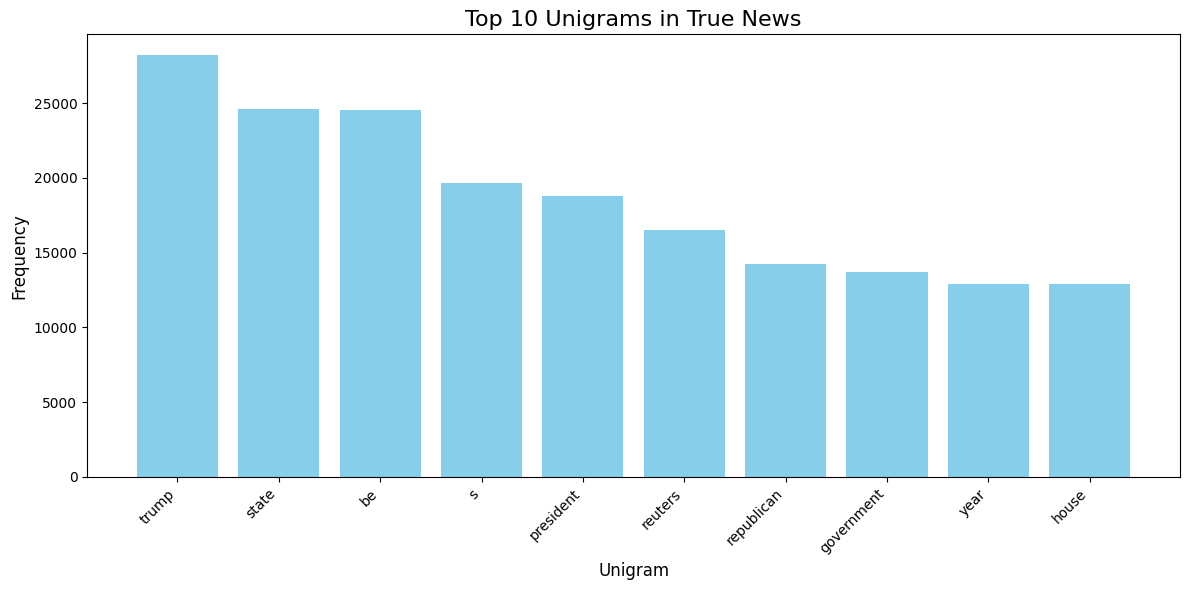

In [85]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Import numpy to handle potential NaN values

# Assuming your training DataFrame is named train_df
# If your DataFrame variable name is different, update it here:
data_df = train_df

# Assuming the column containing the processed text (e.g., lemmatized without POS) is named 'lemmatized_text_no_pos'
# If your processed text column name is different, update it here:
processed_text_column = 'lemmatized_words'

# Assuming the label column is named 'label' and 1 represents True News
# If your label column name or the value for True News is different, update it here:
label_column = 'news_label'
true_news_label_value = 1

# Number of top unigrams to find and plot
num_top_unigrams = 10

# --- Ensure the get_top_ngrams function is defined (assuming it's available in your environment) ---
# If the function is not defined in the current scope, you would need to include its definition here.
# Based on the previous interaction, the function is expected to be available.

# --- Filter news with the specified label (True News) ---
# Check if the label column exists in the DataFrame
if label_column not in data_df.columns:
    print(f"Error: Label column '{label_column}' not found in the DataFrame.")
    raise ValueError(f"Label column '{label_column}' not found.")

# Filter the DataFrame for rows where the label matches the true news value
true_news_df = data_df[data_df[label_column] == true_news_label_value].copy()

# --- Extract processed text and handle potential non-string values ---
# Check if the processed text column exists in the filtered DataFrame
if processed_text_column not in true_news_df.columns:
    print(f"Error: Processed text column '{processed_text_column}' not found in the filtered DataFrame.")
    print(f"Please ensure you have created this column and it is named '{processed_text_column}'.")
    raise ValueError(f"Processed text column '{processed_text_column}' not found.")

# Get the processed text series, filling NaNs with empty strings
true_news_text_series = true_news_df[processed_text_column].fillna('')

# --- Get the top 10 unigrams using the get_top_ngrams function ---
# Call the function with n=1 for unigrams and top_k=10
print(f"Calculating top {num_top_unigrams} unigrams for True News...")
top_unigrams = get_top_ngrams(true_news_text_series, n=1, top_k=num_top_unigrams)

# --- Print the top 10 unigrams ---
print(f"\nTop {num_top_unigrams} Unigrams in True News:")
if top_unigrams:
    for ngram, freq in top_unigrams:
        # N-grams are tuples, join for display
        print(f"{' '.join(ngram)}: {freq}")
else:
    print("No unigrams found or meeting the criteria.")

# --- Plot the top 10 unigrams using a bar graph ---
if top_unigrams:
    # Separate the unigrams (words) and their frequencies
    words = [' '.join(ngram) for ngram, freq in top_unigrams]
    frequencies = [freq for ngram, freq in top_unigrams]

    # Create the bar plot
    plt.figure(figsize=(12, 6)) # Set figure size
    plt.bar(words, frequencies, color='skyblue')

    # Add titles and labels
    plt.title(f'Top {num_top_unigrams} Unigrams in True News', fontsize=16)
    plt.xlabel('Unigram', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Rotate x-axis labels if necessary for readability
    plt.xticks(rotation=45, ha='right')

    # Adjust layout to prevent labels overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("\nCannot plot the bar graph as no unigrams were found.")



##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Calculating top 10 bigrams for True News...

Top 10 Bigrams in True News:
white house: 6425
united state: 6139
north korea: 3216
new york: 3071
prime minister: 2901
islamic state: 2598
last year: 2370
last week: 2299
president trump: 2026
washington reuters: 1975


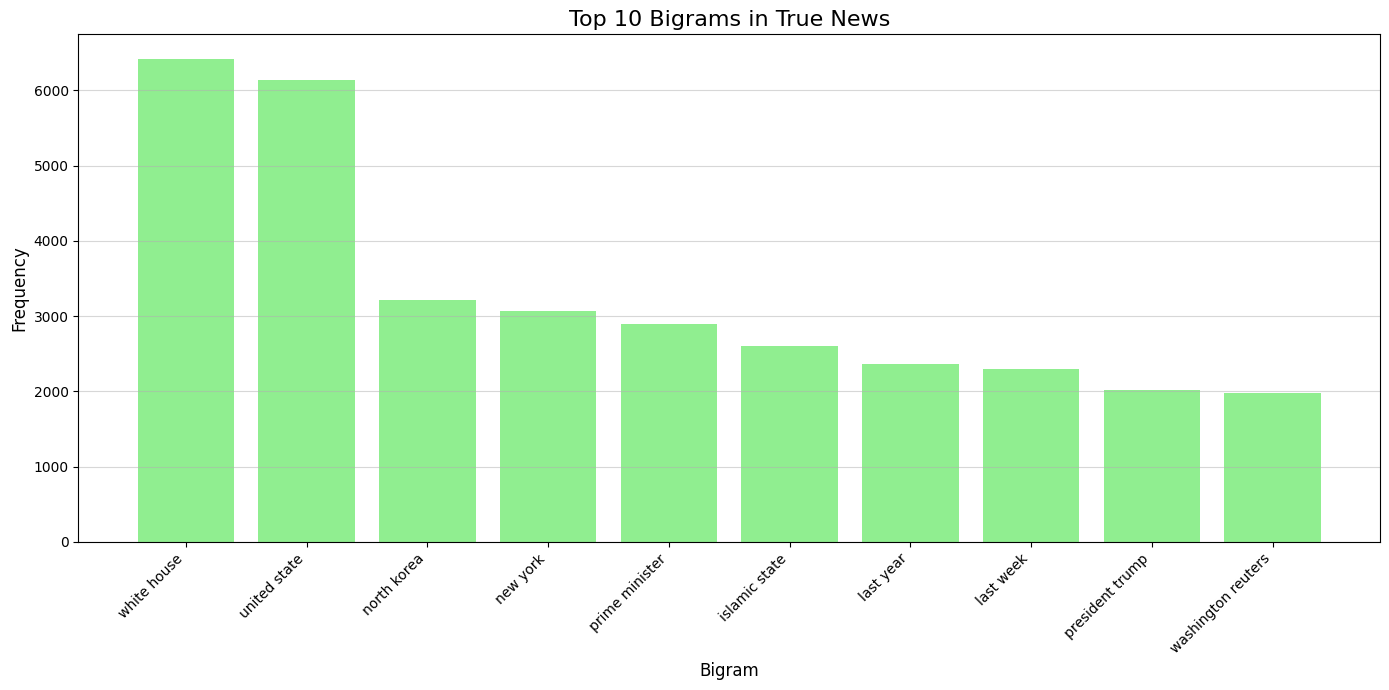

In [86]:

# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Import numpy to handle potential NaN values

# --- Configuration ---
# Assuming your training DataFrame is named train_df
# If your DataFrame variable name is different, update it here:
data_df = train_df

# Assuming the column containing the processed text (e.g., lemmatized without POS) is named 'lemmatized_text_no_pos'
# If your processed text column name is different, update it here:
processed_text_column = 'lemmatized_words'

# Assuming the label column is named 'label' and 1 represents True News
# If your label column name or the value for True News is different, update it here:
label_column = 'news_label'
true_news_label_value = 1

# Number of top bigrams to find and plot
num_top_bigrams = 10

# --- Ensure the get_top_ngrams function is defined (assuming it's available in your environment) ---
# If the function is not defined in the current scope, you would need to include its definition here.
# Based on the previous interaction, the function is expected to be available.

# --- Filter news with the specified label (True News) ---
# Check if the label column exists in the DataFrame
if label_column not in data_df.columns:
    print(f"Error: Label column '{label_column}' not found in the DataFrame.")
    raise ValueError(f"Label column '{label_column}' not found.")

# Filter the DataFrame for rows where the label matches the true news value
true_news_df = data_df[data_df[label_column] == true_news_label_value].copy()

# --- Extract processed text and handle potential non-string values ---
# Check if the processed text column exists in the filtered DataFrame
if processed_text_column not in true_news_df.columns:
    print(f"Error: Processed text column '{processed_text_column}' not found in the filtered DataFrame.")
    print(f"Please ensure you have created this column and it is named '{processed_text_column}'.")
    raise ValueError(f"Processed text column '{processed_text_column}' not found.")

# Get the processed text series, filling NaNs with empty strings
true_news_text_series = true_news_df[processed_text_column].fillna('')

# --- Get the top 10 bigrams using the get_top_ngrams function ---
# Call the function with n=2 for bigrams and top_k=10
print(f"Calculating top {num_top_bigrams} bigrams for True News...")
# Ensure the get_top_ngrams function is accessible in this scope
# (Assuming it was defined in a previous cell or script)
try:
    top_bigrams = get_top_ngrams(true_news_text_series, n=2, top_k=num_top_bigrams)
except NameError:
    print("Error: The function 'get_top_ngrams' is not defined.")
    print("Please ensure the cell or script defining 'get_top_ngrams' has been run.")
    top_bigrams = [] # Set to empty list to prevent further errors


# --- Print the top 10 bigrams ---
print(f"\nTop {num_top_bigrams} Bigrams in True News:")
if top_bigrams:
    for ngram, freq in top_bigrams:
        # N-grams are tuples, join for display
        print(f"{' '.join(ngram)}: {freq}")
else:
    print("No bigrams found or meeting the criteria.")

# --- Plot the top 10 bigrams using a bar graph ---
if top_bigrams:
    # Separate the bigrams (word tuples) and their frequencies
    # Join the words in each bigram tuple for the x-axis labels
    bigram_phrases = [' '.join(ngram) for ngram, freq in top_bigrams]
    frequencies = [freq for ngram, freq in top_bigrams]

    # Create the bar plot
    plt.figure(figsize=(14, 7)) # Increase figure size for bigrams

    # Create the bars
    plt.bar(bigram_phrases, frequencies, color='lightgreen')

    # Add titles and labels
    plt.title(f'Top {num_top_bigrams} Bigrams in True News', fontsize=16)
    plt.xlabel('Bigram', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Rotate x-axis labels for readability, especially with phrases
    plt.xticks(rotation=45, ha='right')

    # Add grid for better readability
    plt.grid(axis='y', alpha=0.5)

    # Adjust layout to prevent labels overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("\nCannot plot the bar graph as no bigrams were found.")


##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Calculating top 10 trigrams for True News...

Top 10 Trigrams in True News:
president barack obama: 822
washington reuters president: 611
reuters president trump: 572
respond request comment: 537
new york reuters: 464
national security adviser: 454
president barack obamas: 452
secretary state rex: 449
former president barack: 446
state rex tillerson: 424


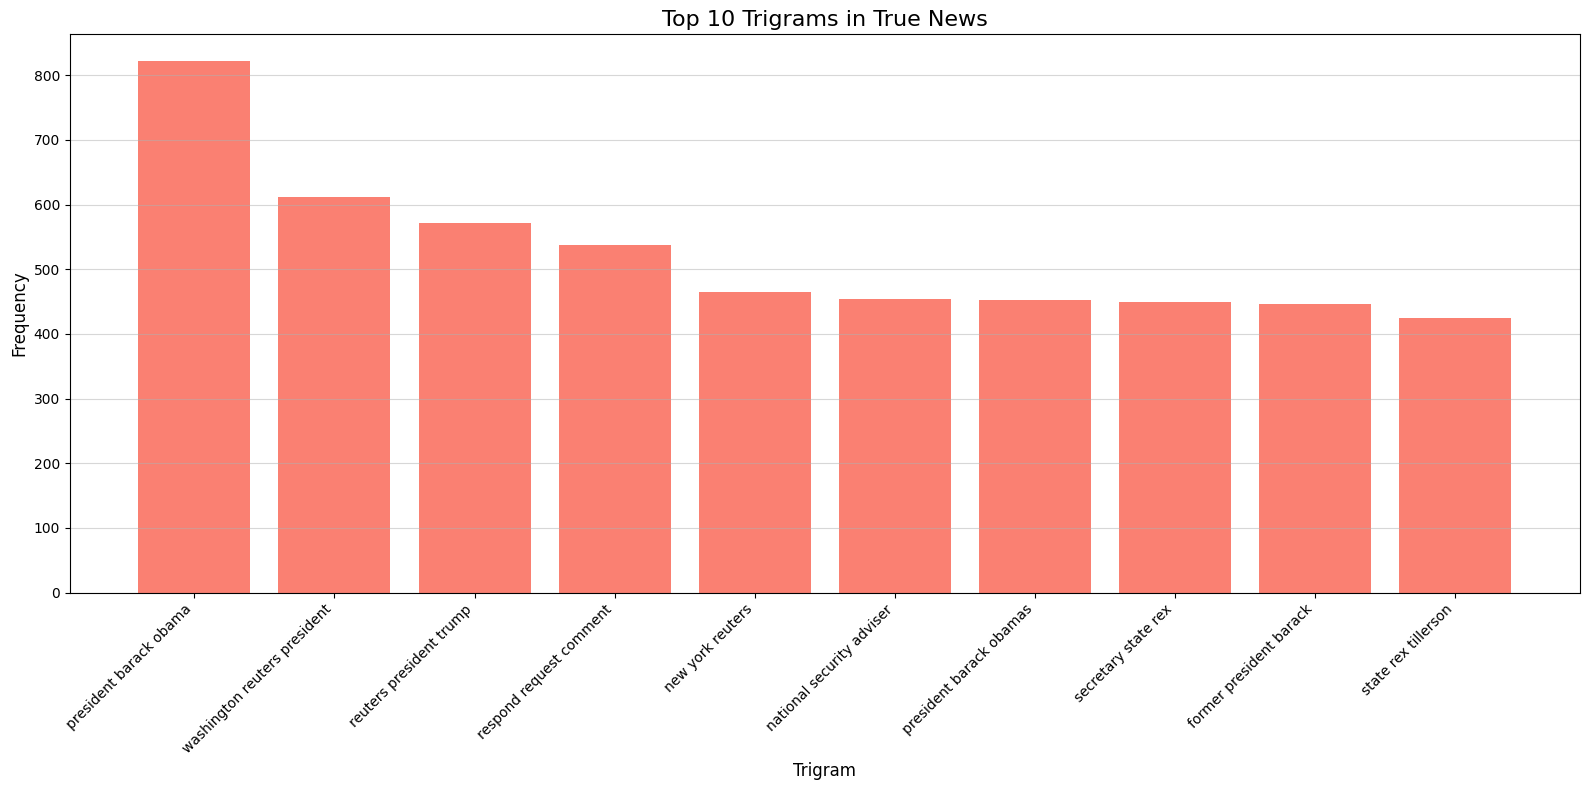

In [87]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Import numpy to handle potential NaN values

# --- Configuration ---
# Assuming your training DataFrame is named train_df
# If your DataFrame variable name is different, update it here:
data_df = train_df

# Assuming the column containing the processed text (e.g., lemmatized without POS) is named 'lemmatized_text_no_pos'
# If your processed text column name is different, update it here:
processed_text_column = 'lemmatized_words'

# Assuming the label column is named 'label' and 1 represents True News
# If your label column name or the value for True News is different, update it here:
label_column = 'news_label'
true_news_label_value = 1

# Number of top trigrams to find and plot
num_top_trigrams = 10

# --- Ensure the get_top_ngrams function is defined (assuming it's available in your environment) ---
# If the function is not defined in the current scope, you would need to include its definition here.
# Based on the previous interaction, the function is expected to be available.

# --- Filter news with the specified label (True News) ---
# Check if the label column exists in the DataFrame
if label_column not in data_df.columns:
    print(f"Error: Label column '{label_column}' not found in the DataFrame.")
    raise ValueError(f"Label column '{label_column}' not found.")

# Filter the DataFrame for rows where the label matches the true news value
true_news_df = data_df[data_df[label_column] == true_news_label_value].copy()

# --- Extract processed text and handle potential non-string values ---
# Check if the processed text column exists in the filtered DataFrame
if processed_text_column not in true_news_df.columns:
    print(f"Error: Processed text column '{processed_text_column}' not found in the filtered DataFrame.")
    print(f"Please ensure you have created this column and it is named '{processed_text_column}'.")
    raise ValueError(f"Processed text column '{processed_text_column}' not found.")

# Get the processed text series, filling NaNs with empty strings
true_news_text_series = true_news_df[processed_text_column].fillna('')

# --- Get the top 10 trigrams using the get_top_ngrams function ---
# Call the function with n=3 for trigrams and top_k=10
print(f"Calculating top {num_top_trigrams} trigrams for True News...")
# Ensure the get_top_ngrams function is accessible in this scope
# (Assuming it was defined in a previous cell or script)
try:
    top_trigrams = get_top_ngrams(true_news_text_series, n=3, top_k=num_top_trigrams)
except NameError:
    print("Error: The function 'get_top_ngrams' is not defined.")
    print("Please ensure the cell or script defining 'get_top_ngrams' has been run.")
    top_trigrams = [] # Set to empty list to prevent further errors


# --- Print the top 10 trigrams ---
print(f"\nTop {num_top_trigrams} Trigrams in True News:")
if top_trigrams:
    for ngram, freq in top_trigrams:
        # N-grams are tuples, join for display
        print(f"{' '.join(ngram)}: {freq}")
else:
    print("No trigrams found or meeting the criteria.")

# --- Plot the top 10 trigrams using a bar graph ---
if top_trigrams:
    # Separate the trigrams (word tuples) and their frequencies
    # Join the words in each trigram tuple for the x-axis labels
    trigram_phrases = [' '.join(ngram) for ngram, freq in top_trigrams]
    frequencies = [freq for ngram, freq in top_trigrams]

    # Create the bar plot
    plt.figure(figsize=(16, 8)) # Increase figure size for trigrams

    # Create the bars
    plt.bar(trigram_phrases, frequencies, color='salmon') # Changed color

    # Add titles and labels
    plt.title(f'Top {num_top_trigrams} Trigrams in True News', fontsize=16)
    plt.xlabel('Trigram', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Rotate x-axis labels for readability, especially with phrases
    plt.xticks(rotation=45, ha='right')

    # Add grid for better readability
    plt.grid(axis='y', alpha=0.5)

    # Adjust layout to prevent labels overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("\nCannot plot the bar graph as no trigrams were found.")


### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Calculating top 10 unigrams for Fake News...

Top 10 Unigrams in Fake News:
trump: 47779
s: 43680
be: 34449
i: 23003
president: 18869
t: 18484
people: 18450
state: 15004
clinton: 12587
time: 12495


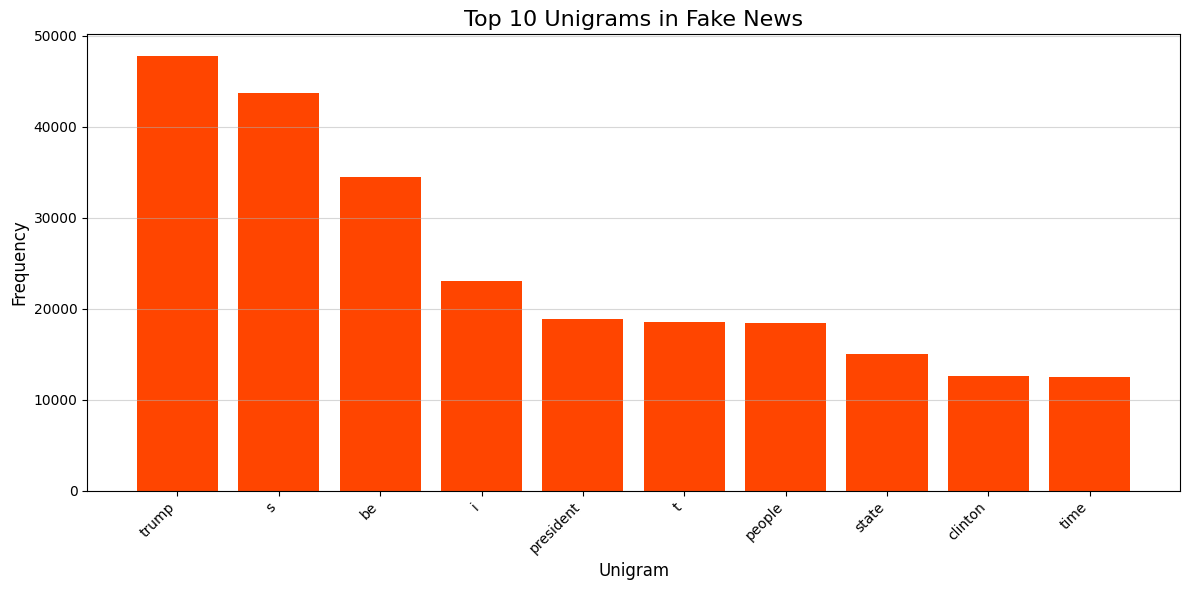

In [88]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Import numpy to handle potential NaN values

# --- Configuration ---
# Assuming your training DataFrame is named train_df
# If your DataFrame variable name is different, update it here:
data_df = train_df

# Assuming the column containing the processed text (e.g., lemmatized without POS) is named 'lemmatized_text_no_pos'
# If your processed text column name is different, update it here:
processed_text_column = 'lemmatized_words'

# Assuming the label column is named 'label' and 0 represents Fake News
# If your label column name or the value for Fake News is different, update it here:
label_column = 'news_label'
fake_news_label_value = 0 # Set to 0 for Fake News

# Number of top unigrams to find and plot
num_top_unigrams = 10

# --- Ensure the get_top_ngrams function is defined (assuming it's available in your environment) ---
# If the function is not defined in the current scope, you would need to include its definition here.
# Based on the previous interaction, the function is expected to be available.

# --- Filter news with the specified label (Fake News) ---
# Check if the label column exists in the DataFrame
if label_column not in data_df.columns:
    print(f"Error: Label column '{label_column}' not found in the DataFrame.")
    raise ValueError(f"Label column '{label_column}' not found.")

# Filter the DataFrame for rows where the label matches the fake news value
fake_news_df = data_df[data_df[label_column] == fake_news_label_value].copy()

# --- Extract processed text and handle potential non-string values ---
# Check if the processed text column exists in the filtered DataFrame
if processed_text_column not in fake_news_df.columns:
    print(f"Error: Processed text column '{processed_text_column}' not found in the filtered DataFrame.")
    print(f"Please ensure you have created this column and it is named '{processed_text_column}'.")
    raise ValueError(f"Processed text column '{processed_text_column}' not found.")

# Get the processed text series, filling NaNs with empty strings
fake_news_text_series = fake_news_df[processed_text_column].fillna('')

# --- Get the top 10 unigrams using the get_top_ngrams function ---
# Call the function with n=1 for unigrams and top_k=10
print(f"Calculating top {num_top_unigrams} unigrams for Fake News...")
# Ensure the get_top_ngrams function is accessible in this scope
# (Assuming it was defined in a previous cell or script)
try:
    top_unigrams = get_top_ngrams(fake_news_text_series, n=1, top_k=num_top_unigrams)
except NameError:
    print("Error: The function 'get_top_ngrams' is not defined.")
    print("Please ensure the cell or script defining 'get_top_ngrams' has been run.")
    top_unigrams = [] # Set to empty list to prevent further errors


# --- Print the top 10 unigrams ---
print(f"\nTop {num_top_unigrams} Unigrams in Fake News:")
if top_unigrams:
    for ngram, freq in top_unigrams:
        # N-grams are tuples, join for display
        print(f"{' '.join(ngram)}: {freq}")
else:
    print("No unigrams found or meeting the criteria.")

# --- Plot the top 10 unigrams using a bar graph ---
if top_unigrams:
    # Separate the unigrams (words) and their frequencies
    words = [' '.join(ngram) for ngram, freq in top_unigrams]
    frequencies = [freq for ngram, freq in top_unigrams]

    # Create the bar plot
    plt.figure(figsize=(12, 6)) # Set figure size

    # Create the bars
    plt.bar(words, frequencies, color='orangered') # Changed color for fake news

    # Add titles and labels
    plt.title(f'Top {num_top_unigrams} Unigrams in Fake News', fontsize=16) # Updated title
    plt.xlabel('Unigram', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Rotate x-axis labels if necessary for readability
    plt.xticks(rotation=45, ha='right')

    # Add grid for better readability
    plt.grid(axis='y', alpha=0.5)

    # Adjust layout to prevent labels overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("\nCannot plot the bar graph as no unigrams were found.")


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Calculating top 10 bigrams for Fake News...

Top 10 Bigrams in Fake News:
trump s: 6963
donald trump: 6278
hillary clinton: 4866
white house: 4542
united state: 3173
new york: 2881
president trump: 2672
fox news: 1868
clinton s: 1522
doesn t: 1384


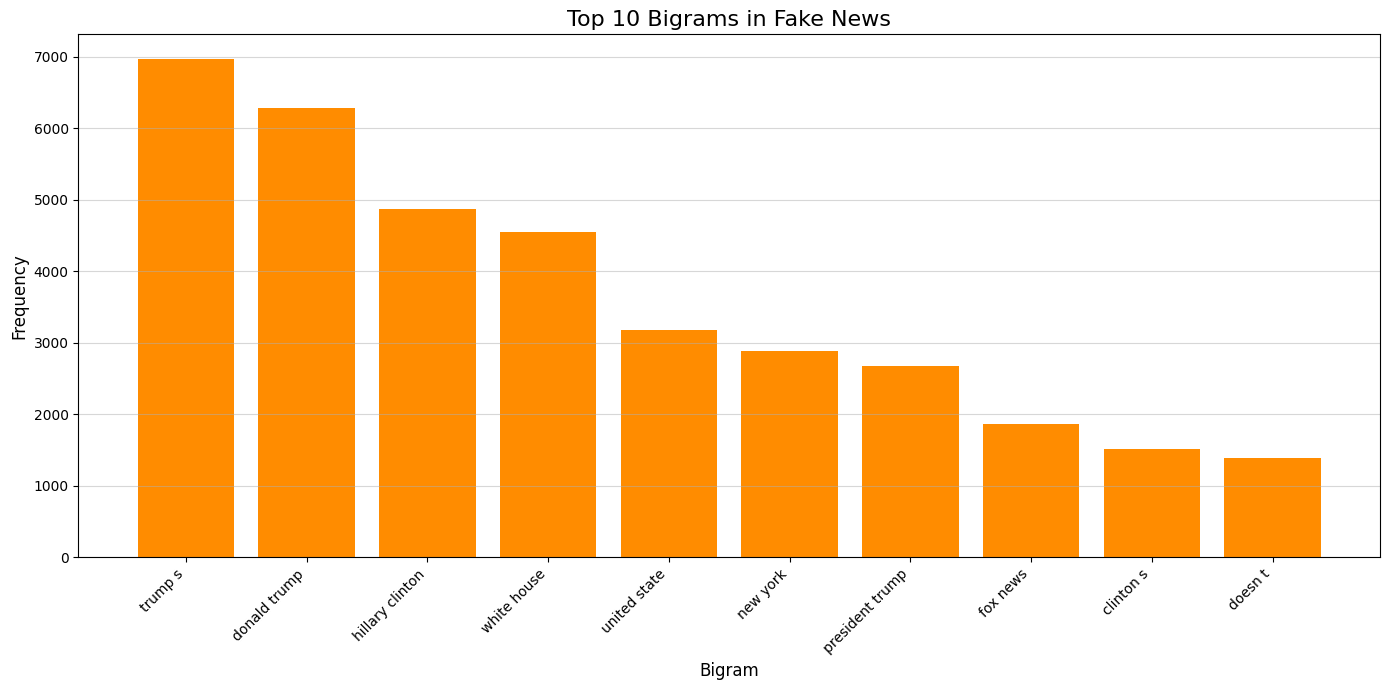

In [89]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Import numpy to handle potential NaN values

# --- Configuration ---
# Assuming your training DataFrame is named train_df
# If your DataFrame variable name is different, update it here:
data_df = train_df

# Assuming the column containing the processed text (e.g., lemmatized without POS) is named 'lemmatized_text_no_pos'
# If your processed text column name is different, update it here:
processed_text_column = 'lemmatized_words'

# Assuming the label column is named 'label' and 0 represents Fake News
# If your label column name or the value for Fake News is different, update it here:
label_column = 'news_label'
fake_news_label_value = 0 # Set to 0 for Fake News

# Number of top bigrams to find and plot
num_top_bigrams = 10

# --- Ensure the get_top_ngrams function is defined (assuming it's available in your environment) ---
# If the function is not defined in the current scope, you would need to include its definition here.
# Based on the previous interaction, the function is expected to be available.

# --- Filter news with the specified label (Fake News) ---
# Check if the label column exists in the DataFrame
if label_column not in data_df.columns:
    print(f"Error: Label column '{label_column}' not found in the DataFrame.")
    raise ValueError(f"Label column '{label_column}' not found.")

# Filter the DataFrame for rows where the label matches the fake news value
fake_news_df = data_df[data_df[label_column] == fake_news_label_value].copy()

# --- Extract processed text and handle potential non-string values ---
# Check if the processed text column exists in the filtered DataFrame
if processed_text_column not in fake_news_df.columns:
    print(f"Error: Processed text column '{processed_text_column}' not found in the filtered DataFrame.")
    print(f"Please ensure you have created this column and it is named '{processed_text_column}'.")
    raise ValueError(f"Processed text column '{processed_text_column}' not found.")

# Get the processed text series, filling NaNs with empty strings
fake_news_text_series = fake_news_df[processed_text_column].fillna('')

# --- Get the top 10 bigrams using the get_top_ngrams function ---
# Call the function with n=2 for bigrams and top_k=10
print(f"Calculating top {num_top_bigrams} bigrams for Fake News...")
# Ensure the get_top_ngrams function is accessible in this scope
# (Assuming it was defined in a previous cell or script)
try:
    top_bigrams = get_top_ngrams(fake_news_text_series, n=2, top_k=num_top_bigrams)
except NameError:
    print("Error: The function 'get_top_ngrams' is not defined.")
    print("Please ensure the cell or script defining 'get_top_ngrams' has been run.")
    top_bigrams = [] # Set to empty list to prevent further errors


# --- Print the top 10 bigrams ---
print(f"\nTop {num_top_bigrams} Bigrams in Fake News:")
if top_bigrams:
    for ngram, freq in top_bigrams:
        # N-grams are tuples, join for display
        print(f"{' '.join(ngram)}: {freq}")
else:
    print("No bigrams found or meeting the criteria.")

# --- Plot the top 10 bigrams using a bar graph ---
if top_bigrams:
    # Separate the bigrams (word tuples) and their frequencies
    # Join the words in each bigram tuple for the x-axis labels
    bigram_phrases = [' '.join(ngram) for ngram, freq in top_bigrams]
    frequencies = [freq for ngram, freq in top_bigrams]

    # Create the bar plot
    plt.figure(figsize=(14, 7)) # Increase figure size for bigrams

    # Create the bars
    plt.bar(bigram_phrases, frequencies, color='darkorange') # Changed color for fake news bigrams

    # Add titles and labels
    plt.title(f'Top {num_top_bigrams} Bigrams in Fake News', fontsize=16) # Updated title
    plt.xlabel('Bigram', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Rotate x-axis labels for readability, especially with phrases
    plt.xticks(rotation=45, ha='right')

    # Add grid for better readability
    plt.grid(axis='y', alpha=0.5)

    # Adjust layout to prevent labels overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("\nCannot plot the bar graph as no bigrams were found.")


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Calculating top 10 trigrams for Fake News...

Top 10 Trigrams in Fake News:
j trump realdonaldtrump: 1052
new york time: 1040
donald j trump: 927
donald trump s: 847
hillary clinton s: 669
news century wire: 630
video screen capture: 503
image video screen: 477
president united state: 428
new york city: 418


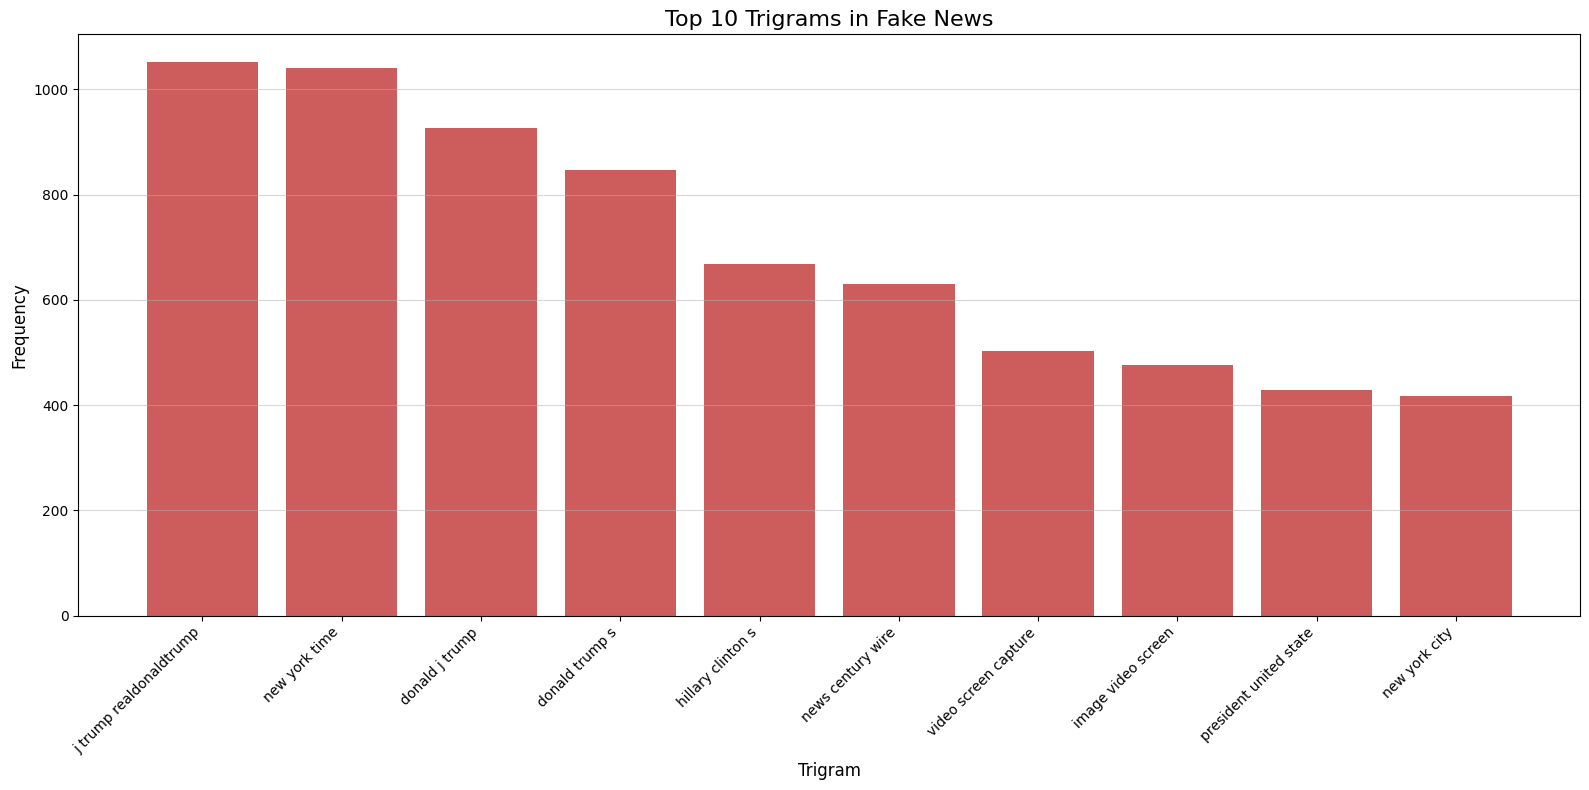

In [90]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Import numpy to handle potential NaN values

# --- Configuration ---
# Assuming your training DataFrame is named train_df
# If your DataFrame variable name is different, update it here:
data_df = train_df

# Assuming the column containing the processed text (e.g., lemmatized without POS) is named 'lemmatized_text_no_pos'
# If your processed text column name is different, update it here:
processed_text_column = 'lemmatized_words'

# Assuming the label column is named 'label' and 0 represents Fake News
# If your label column name or the value for Fake News is different, update it here:
label_column = 'news_label'
fake_news_label_value = 0 # Set to 0 for Fake News

# Number of top trigrams to find and plot
num_top_trigrams = 10

# --- Ensure the get_top_ngrams function is defined (assuming it's available in your environment) ---
# If the function is not defined in the current scope, you would need to include its definition here.
# Based on the previous interaction, the function is expected to be available.

# --- Filter news with the specified label (Fake News) ---
# Check if the label column exists in the DataFrame
if label_column not in data_df.columns:
    print(f"Error: Label column '{label_column}' not found in the DataFrame.")
    raise ValueError(f"Label column '{label_column}' not found.")

# Filter the DataFrame for rows where the label matches the fake news value
fake_news_df = data_df[data_df[label_column] == fake_news_label_value].copy()

# --- Extract processed text and handle potential non-string values ---
# Check if the processed text column exists in the filtered DataFrame
if processed_text_column not in fake_news_df.columns:
    print(f"Error: Processed text column '{processed_text_column}' not found in the filtered DataFrame.")
    print(f"Please ensure you have created this column and it is named '{processed_text_column}'.")
    raise ValueError(f"Processed text column '{processed_text_column}' not found.")

# Get the processed text series, filling NaNs with empty strings
fake_news_text_series = fake_news_df[processed_text_column].fillna('')

# --- Get the top 10 trigrams using the get_top_ngrams function ---
# Call the function with n=3 for trigrams and top_k=10
print(f"Calculating top {num_top_trigrams} trigrams for Fake News...")
# Ensure the get_top_ngrams function is accessible in this scope
# (Assuming it was defined in a previous cell or script)
try:
    top_trigrams = get_top_ngrams(fake_news_text_series, n=3, top_k=num_top_trigrams)
except NameError:
    print("Error: The function 'get_top_ngrams' is not defined.")
    print("Please ensure the cell or script defining 'get_top_ngrams' has been run.")
    top_trigrams = [] # Set to empty list to prevent further errors


# --- Print the top 10 trigrams ---
print(f"\nTop {num_top_trigrams} Trigrams in Fake News:")
if top_trigrams:
    for ngram, freq in top_trigrams:
        # N-grams are tuples, join for display
        print(f"{' '.join(ngram)}: {freq}")
else:
    print("No trigrams found or meeting the criteria.")

# --- Plot the top 10 trigrams using a bar graph ---
if top_trigrams:
    # Separate the trigrams (word tuples) and their frequencies
    # Join the words in each trigram tuple for the x-axis labels
    trigram_phrases = [' '.join(ngram) for ngram, freq in top_trigrams]
    frequencies = [freq for ngram, freq in top_trigrams]

    # Create the bar plot
    plt.figure(figsize=(16, 8)) # Increase figure size for trigrams

    # Create the bars
    plt.bar(trigram_phrases, frequencies, color='indianred') # Changed color for fake news trigrams

    # Add titles and labels
    plt.title(f'Top {num_top_trigrams} Trigrams in Fake News', fontsize=16) # Updated title
    plt.xlabel('Trigram', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Rotate x-axis labels for readability, especially with phrases
    plt.xticks(rotation=45, ha='right')

    # Add grid for better readability
    plt.grid(axis='y', alpha=0.5)

    # Adjust layout to prevent labels overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("\nCannot plot the bar graph as no trigrams were found.")


## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [43]:
# # Add a new column to calculate the character length of cleaned news text

# # Add a new column to calculate the character length of lemmatized news text with POS tags removed
# # Add a new column to calculate the character length of cleaned news text
# #train_df['cleaned_text_char_length'] = train_df['cleaned_text'].str.len()

# # Add a new column to calculate the character length of lemmatized news text with POS tags removed
# train_df['lemmatized_text_no_pos_char_length'] = train_df['lemmatized_words'].str.len()

# # You can display the head of the DataFrame with the new columns to verify
# print(train_df[['cleaned_text', 'cleaned_text_char_length', 'lemmatized_words', 'lemmatized_text_no_pos_char_length']].head())

##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

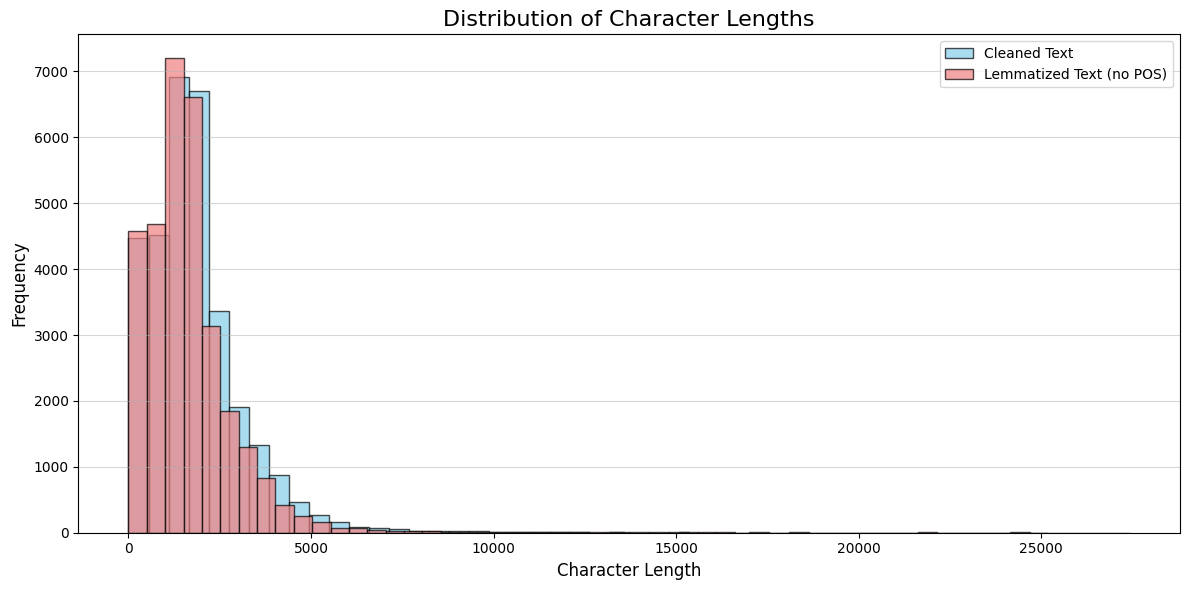

In [44]:
# # Create a histogram plot to visualise character lengths

# # Add histogram for cleaned news text

# # Add histogram for lemmatized news text with POS tags removed

# import matplotlib.pyplot as plt

# # Set the figure size for better readability
# plt.figure(figsize=(12, 6))

# # Add histogram for cleaned news text
# plt.hist(train_df['cleaned_text_char_length'], bins=50, alpha=0.7, label='Cleaned Text', color='skyblue', edgecolor='black')

# # Add histogram for lemmatized news text with POS tags removed
# plt.hist(train_df['lemmatized_text_no_pos_char_length'], bins=50, alpha=0.7, label='Lemmatized Text (no POS)', color='lightcoral', edgecolor='black')

# # Add plot title and labels
# plt.title('Distribution of Character Lengths', fontsize=16)
# plt.xlabel('Character Length', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)

# # Add a legend to identify the histograms
# plt.legend()

# # Add a grid for easier reading along the y-axis
# plt.grid(axis='y', alpha=0.5)

# # Adjust layout to prevent labels and title from overlapping
# plt.tight_layout()

# # Show the plot
# plt.show()


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

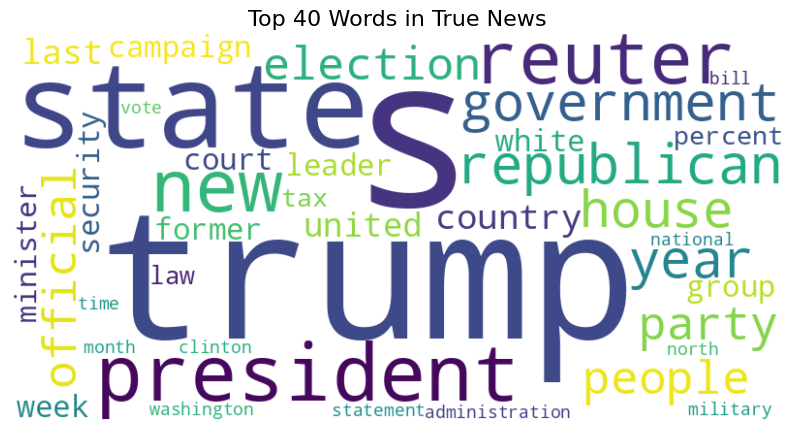

In [45]:
# ## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# # Filter news with label 1 (True News) and convert to it string and handle any non-string values

# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# import ast

# # Assuming your DataFrame is named train_df
# true_news_df = train_df[train_df['news_label'] == 1]  # Filter for true news

# # 1. Check if true_news_df is empty:
# if true_news_df.empty:
#     print("Error: No true news found in the training data.")
# else:
#     # 2. Safely evaluate the 'lemmatized_words' column:
#     true_news_df['lemmatized_words'] = true_news_df['lemmatized_words'].apply(
#         lambda x: ast.literal_eval(x) if isinstance(x, str) else []
#     )

#     # 3. Join the words, but provide a fallback if the list is empty:
#     all_true_news_text = ' '.join(
#         [' '.join(words) for words in true_news_df['lemmatized_words'] if words]
#     ) or " "  # Provide a single space as fallback to avoid error if all lists are empty

#     # 4. Check if all_true_news_text is empty after handling empty lists:
#     if not all_true_news_text.strip():
#         print("Warning: all_true_news_text is empty even after handling empty lists. Check preprocessing.")
#     else:
#         # Generate word cloud
#         wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=40, collocations=False).generate(all_true_news_text)

#         # Display the word cloud
#         plt.figure(figsize=(10, 7))
#         plt.imshow(wordcloud, interpolation='bilinear')
#         plt.axis("off")
#         plt.title('Top 40 Words in True News', fontsize=16)
#         plt.show()

##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

Total lemmatized words collected from fake news: 3815434

Top 40 most frequent words in fake news:
- trump: 69159
- s: 62632
- be: 49338
- i: 32891
- president: 27055
- t: 26808
- people: 26386
- state: 21707
- time: 17859
- clinton: 17622
- american: 16238
- year: 14955
- new: 14915
- hillary: 14747
- news: 14733
- republican: 14299
- image: 14092
- white: 13831
- donald: 13539
- other: 13226
- woman: 11667
- campaign: 11434
- medium: 11382
- house: 11219
- country: 10849
- video: 10606
- many: 9683
- obama: 9667
- election: 9606
- way: 9537
- day: 9517
- government: 9119
- thing: 9089
- black: 8875
- law: 8802
- police: 8475
- party: 8210
- group: 7963
- last: 7924
- political: 7627

Generating word cloud...


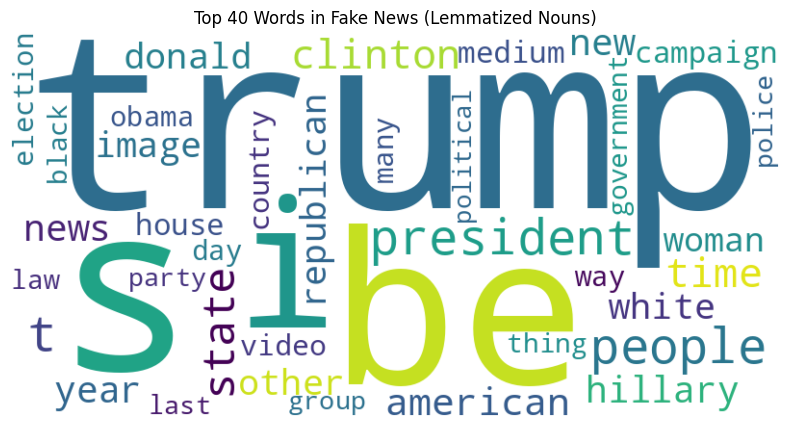

Word cloud generated.


In [46]:
# ## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# # Generate word cloud for Fake News
# import pandas as pd
# from collections import Counter
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# import ast
# import re

# df_clean = pd.read_csv("/content/drive/MyDrive/clean_df.csv")

# # Correctly filter for fake news:
# fake_news_df = df_clean[df_clean['news_label'] == 0].copy()

# # **Extract and Combine Lemmatized Words (Corrected):**
# all_fake_words = []
# for index, row in fake_news_df.iterrows():
#     word_list_str = row['lemmatized_words']

#     # Attempt to evaluate as a literal Python list first
#     try:
#         word_list = ast.literal_eval(word_list_str)
#         if isinstance(word_list, list) and all(isinstance(word, str) for word in word_list):
#             all_fake_words.extend(word_list)
#             continue  # Skip to the next row if successful

#     except (SyntaxError, ValueError):
#         pass  # If evaluation fails, proceed to the next attempt

#     # If ast.literal_eval fails, try removing specific characters
#     # Remove brackets, single quotes, double quotes, and extra spaces
#     word_list_str = re.sub(r"[\[\]'\" ]+", "", word_list_str)

#     # If the string is not empty after removing characters, split it
#     if word_list_str:
#         word_list = word_list_str.split(",")
#         all_fake_words.extend(word_list)


# print(f"Total lemmatized words collected from fake news: {len(all_fake_words)}")

# if not all_fake_words:
#     print("No words found in the fake news data after processing. Cannot generate word cloud.")
# else:
#     # --- 3. Calculate Word Frequency ---
#     word_counts = Counter(all_fake_words)

#     # --- 4. Select Top 40 Words ---
#     top_40_words = dict(word_counts.most_common(40))
#     print("\nTop 40 most frequent words in fake news:")
#     for word, count in top_40_words.items():
#         print(f"- {word}: {count}")

#     # --- 5. Generate Word Cloud ---
#     print("\nGenerating word cloud...")
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_40_words)

#     # --- 6. Display Word Cloud ---
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis('off') # Hide axes
#     plt.title('Top 40 Words in Fake News (Lemmatized Nouns)')
#     plt.show()
#     print("Word cloud generated.")


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [48]:
# ## Write a function to get the specified top n-grams
# import nltk
# from collections import Counter
# from nltk.util import ngrams

# def get_top_ngrams(words_list, n=2, top_k=40):
#     """
#     Calculates the frequency of n-grams in a list of words and returns the top_k most common.

#     Args:
#         words_list (list): A list of words (e.g., the lemmatized words from your DataFrame).
#         n (int): The size of the n-gram (e.g., 1 for unigrams, 2 for bigrams, 3 for trigrams).
#                  Defaults to 2 (bigrams).
#         top_k (int): The number of top n-grams to return. Defaults to 40.

#     Returns:
#         list: A list of tuples, where each tuple contains an n-gram (as a tuple of words)
#               and its frequency count. Returns an empty list if words_list is empty
#               or n is less than 1.
#     """
#     if not words_list or n < 1:
#         print("Warning: Input word list is empty or n is less than 1.")
#         return []

#     # Generate n-grams from the list of words
#     # ngrams() returns an iterator, so we convert it to a list
#     ngram_list = list(ngrams(words_list, n))

#     if not ngram_list:
#         print(f"Warning: No {n}-grams could be generated from the input list.")
#         return []

#     # Count the frequency of each n-gram
#     ngram_counts = Counter(ngram_list)

#     # Get the top_k most common n-grams
#     top_ngrams = ngram_counts.most_common(top_k)

#     return top_ngrams

##### 5.3.2 Handle the NaN values

In [49]:
# ## First handle NaN values in the text data
# import pandas as pd
# import re
# import string
# import nltk
# import os
# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer
# from collections import Counter

# # --- NLTK Setup ---
# # Define the path where you want to download the NLTK data
# # Using a temporary directory might be better in some environments like Colab
# # nltk_data_path = "/tmp/nltk_data" # Alternative for Colab
# nltk_data_path = os.path.expanduser("~/.nltk_data") # Or another suitable persistent path
# os.makedirs(nltk_data_path, exist_ok=True) # Create the directory if it doesn't exist

# # Set the NLTK data path to the new location
# nltk.data.path.append(nltk_data_path)

# # Download required NLTK data - NLTK will check if already present
# print("Attempting to download required NLTK data (will skip if already present)...")
# try:
#     nltk.download('averaged_perceptron_tagger', download_dir=nltk_data_path, quiet=True)
#     nltk.download('averaged_perceptron_tagger_eng', download_dir=nltk_data_path, quiet=True)
#     nltk.download('wordnet', download_dir=nltk_data_path, quiet=True)
#     print("NLTK data download/check complete.")
# except Exception as e:
#     print(f"An error occurred during NLTK data setup: {e}")
#     print("Please ensure you have an internet connection and the NLTK library is correctly installed.")


# # --- Helper Function for POS Tagging ---
# lemmatizer = WordNetLemmatizer()

# def get_wordnet_pos(tag):
#     """Map NLTK POS tags to WordNet POS tags"""
#     if tag.startswith('J'):
#         return wordnet.ADJ
#     elif tag.startswith('V'):
#         return wordnet.VERB
#     elif tag.startswith('N'):
#         return wordnet.NOUN
#     elif tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         # Default to noun if tag is not recognized or is punctuation/symbol
#         return wordnet.NOUN

# # --- Text Processing Functions ---

# def clean_text(text):
#     """
#     Performs basic text cleaning: lowercase, remove special characters, URLs,
#     HTML tags, punctuation, numbers, and extra whitespace.
#     Returns the cleaned text as a string.
#     """
#     if not isinstance(text, str):
#         # Handle potential non-string inputs gracefully
#         return ""
#     text = text.lower() # make the text in lowercase
#     text = re.sub('\[.*?\]','',text) # Remove text in square brackets
#     text = re.sub('https?://\S+|www\.\S+','',text) # Remove URLs
#     text = re.sub('<.*?>+','',text) # Remove HTML tags
#     # Use str.translate for potentially faster punctuation removal
#     text = text.translate(str.maketrans('', '', string.punctuation))
#     text = re.sub('\n',' ',text) # Replace newlines with spaces
#     text = re.sub('\w*\d\w*','',text) # Remove words containing numbers
#     # Reduce multiple spaces to single and strip whitespace
#     text = re.sub(r'\s+', ' ', text).strip()
#     return text

# def lemmatize_and_filter_nouns(lemmatized_words):
#     """
#     Takes cleaned text string, tokenizes, POS tags, lemmatizes,
#     filters for Nouns (NN, NNS), and returns a list of lemmatized nouns.
#     """
#     if not isinstance(lemmatized_words, str) or not lemmatized_words:
#         # Return empty list for non-string or empty inputs
#         return []

#     # Tokenization
#     words = lemmatized_words.split()

#     if not words:
#         return [] # Return empty list if no words after splitting

#     # POS Tagging
#     pos_tags = nltk.pos_tag(words)

#     lemmatized_nouns = []
#     for word, tag in pos_tags:
#         # Filter for Nouns (NN and NNS)
#         if tag in ['NN', 'NNS']:
#             wntag = get_wordnet_pos(tag)
#             lemma = lemmatizer.lemmatize(word, pos=wntag)
#             lemmatized_nouns.append(lemma)

#     return lemmatized_nouns


# # --- Placeholder for your data loading ---
# # Replace this section with your actual code to load your DataFrame
# # For example:
# data = pd.read_csv("/content/drive/MyDrive/clean_df.csv")
# # Make sure your DataFrame has 'text' and 'news_label' columns.

# # Example placeholder DataFrame (replace with your actual data loading)


# print("Placeholder 'data' DataFrame created.")
# print(data.head())
# # --- End of placeholder ---


# # Create the new DataFrame df_clean by selecting necessary columns
# # Use .copy() to avoid SettingWithCopyWarning
# df = data[['lemmatized_words', 'news_label']].copy()

# # --- Handle NaN values in the 'lemmatized_words' column ---
# print("Checking for and handling NaN values in the 'lemmatized_words' column...")
# initial_nan_count = df['lemmatized_words'].isnull().sum()
# if initial_nan_count > 0:
#     print(f"Found {initial_nan_count} NaN values in the 'text' column. Replacing with empty strings.")
#     df['lemmatized_words'] = df['lemmatized_words'].fillna('') # Replace NaN with empty string
#     print("NaN values handled.")
# else:
#     print("No NaN values found in the 'lemmatized_words' column.")


# # Create the new DataFrame df_clean
# df_clean = pd.DataFrame()

# # Apply the cleaning function to create the 'lemmatized_words' column
# print("Applying text cleaning...")
# # Apply cleaning to the original 'lemmatized_words' column (which now has NaNs replaced)
# df_clean['lemmatized_words'] = df['lemmatized_words'].apply(clean_text)
# print("Text cleaning complete.")

# # Apply the lemmatization and noun filtering function to the 'cleaned_text' column
# print("Applying lemmatization and noun filtering...")
# # Apply to the 'cleaned_text' column for efficiency
# df_clean['lemmatized_words'] = df_clean['lemmatized_words'].apply(lemmatize_and_filter_nouns)
# print("Lemmatization and noun filtering complete.")

# # Add the 'news_label' column from the original DataFrame
# df_clean['news_label'] = df['news_label']

# # Display the first few rows of the new DataFrame
# print("\nFirst 5 rows of the cleaned DataFrame:")
# print(df_clean.head())

# # Optional: Check for any NaNs in the new columns (shouldn't be any if processing is correct)
# print("\nChecking for NaN values in the new df_clean columns:")
# print(df_clean.isnull().sum())


# # Save the DataFrame to CSV (optional, only if needed)
# # print("\nSaving cleaned DataFrame to CSV...")
# df_clean.to_csv("/content/drive/MyDrive/clean_df.csv", index=False)
# # print("DataFrame saved.")

# # If you need to load it back later, use:
# df_clean = pd.read_csv("/content/drive/MyDrive/clean_df.csv")



Attempting to download required NLTK data (will skip if already present)...
NLTK data download/check complete.
Placeholder 'data' DataFrame created.
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [9]:
# ## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
# import pandas as pd
# from collections import Counter
# import matplotlib.pyplot as plt
# import ast # Import ast for safely evaluating string representations of lists
# from nltk.util import ngrams # Import ngrams for generating n-grams
# import re
# import string


# # --- Helper function for getting top n-grams (included for self-containment) ---
# def get_top_ngrams(words_list, n=2, top_k=40):
#     """
#     Calculates the frequency of n-grams in a list of words and returns the top_k most common.

#     Args:
#         words_list (list): A list of words (e.g., the lemmatized words from your DataFrame).
#         n (int): The size of the n-gram (e.g., 1 for unigrams, 2 for bigrams, 3 for trigrams).
#                  Defaults to 2 (bigrams).
#         top_k (int): The number of top n-grams to return. Defaults to 40.

#     Returns:
#         list: A list of tuples, where each tuple contains an n-gram (as a tuple of words)
#               and its frequency count. Returns an empty list if words_list is empty
#               or n is less than 1.
#     """
#     if not words_list or n < 1:
#         print("Warning: Input word list is empty or n is less than 1.")
#         return []

#     # Generate n-grams from the list of words
#     # ngrams() returns an iterator, so we convert it to a list
#     ngram_list = list(ngrams(words_list, n))

#     if not ngram_list:
#         print(f"Warning: No {n}-grams could be generated from the input list.")
#         return []

#     # Count the frequency of each n-gram
#     ngram_counts = Counter(ngram_list)

#     # Get the top_k most common n-grams
#     top_ngrams = ngram_counts.most_common(top_k)

#     return top_ngrams


# def clean_text(text):
#     """
#     Cleans text: lowercase, removes special chars, URLs, HTML, punctuation, numbers, and extra spaces.
#     Converts list-like strings to lists of words, then flattens the list.
#     Returns a list of cleaned words.
#     """
#     if not isinstance(text, str):
#         return []  # Return empty list for non-string inputs

#     # 1. Attempt to evaluate as a list:
#     try:
#         word_list = ast.literal_eval(text)  # Try to directly evaluate as a list
#         if isinstance(word_list, list):  # Check if it's actually a list
#             # Flatten the list if necessary
#             word_list = [item for sublist in word_list for item in sublist] if any(isinstance(i, list) for i in word_list) else word_list
#             # Extend the list of cleaned words
#             cleaned_words = word_list
#         else:
#             cleaned_words = [word_list]
#     except (SyntaxError, ValueError):
#         # 2. Fallback: Handle as plain text
#         cleaned_words = re.findall(r'\b\w+\b', text.lower())  # Find all words using regex

#     # 3. Further cleaning for each individual word:
#     final_cleaned_words = []
#     for word in cleaned_words:
#         word = re.sub('\[.*?\]', '', word)  # Remove any remaining text in square brackets
#         word = re.sub('https?://\S+|www\.\S+', '', word)  # Remove URLs
#         word = re.sub('<.*?>+', '', word)  # Remove HTML tags
#         word = word.translate(str.maketrans('', '', string.punctuation))
#         word = re.sub('\n', ' ', word)  # Replace newlines with spaces
#         word = re.sub('\w*\d\w*', '', word)  # Remove words containing numbers
#         word = re.sub(r'\s+', ' ', word).strip()  # Reduce multiple spaces and strip whitespace
#         if word:  # Add only if word is not empty after cleaning
#             final_cleaned_words.append(word)

#     return final_cleaned_words


# # --- Assume df_clean DataFrame is already created and available ---
# # If not, you might need to load it, e.g.:
# df_clean = pd.read_csv("/content/drive/MyDrive/clean_df.csv")

# # --- Assume all_true_words list is available from previous steps ---
# # If not, you would need to recreate it by filtering df_clean and extracting/combining
# # the 'lemmatized_words' for 'true' news, similar to the 'true_news_unigram_analysis' code.
# # Example of how to recreate all_true_words if needed:

# all_true_words = []
# for index, row in df_clean[df_clean['news_label'] == 1].iterrows():
#     try:
#         # Apply clean_text for consistent format
#         words = clean_text(row['lemmatized_words'])

#         # Check if it's a list before extending:
#         if isinstance(words, list):
#             all_true_words.extend(words)
#         else:
#             print(f"Warning: Non-list data found in 'lemmatized_words' at index {index}: {words}")

#     except (ValueError, SyntaxError, TypeError) as e:
#         print(f"Error processing row at index {index}: {e}")
#         print(f"Data in 'lemmatized_words': {row['lemmatized_words']}")


# # --- 1. Get Top 10 Bigrams ---
# print("Calculating top 10 bigrams for true news...")
# # Use the get_top_ngrams function with n=2 for bigrams and top_k=10
# if all_true_words: # Check if all_true_words exists and is not empty
#     top_10_bigrams = get_top_ngrams(all_true_words, n=2, top_k=10)
#     print("Top 10 bigram calculation complete.")

#     # --- 2. Print Top 10 Bigrams ---
#     print("\nTop 10 most frequent bigrams in true news:")
#     if top_10_bigrams:
#         for bigram, count in top_10_bigrams:
#             print(f"- {' '.join(bigram)}: {count}")
#     else:
#         print("No bigrams found.")


#     # --- 3. Plot Top 10 Bigrams ---
#     print("\nGenerating bar graph for top 10 bigrams...")
#     if top_10_bigrams:
#         # Prepare data for plotting
#         bigram_labels = [' '.join(bigram) for bigram, count in top_10_bigrams]
#         counts = [count for bigram, count in top_10_bigrams]

#         plt.figure(figsize=(14, 7)) # Adjust figure size for better readability
#         plt.bar(bigram_labels, counts, color='lightgreen')
#         plt.xlabel("Bigram")
#         plt.ylabel("Frequency")
#         plt.title("Top 10 Most Frequent Bigrams in True News")
#         plt.xticks(rotation=45, ha='right') # Rotate labels for readability
#         plt.tight_layout() # Adjust layout to prevent labels overlapping
#         plt.show()
#         print("Bar graph generated.")
#     else:
#         print("Cannot generate bar graph as no bigrams were found.")

# else:
#     print("Error: 'all_true_words' list not found or is empty. Please ensure the true news processing step was completed successfully.")

Calculating top 10 bigrams for true news...
Error: 'all_true_words' list not found or is empty. Please ensure the true news processing step was completed successfully.


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [6]:
# ## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
# import pandas as pd
# from collections import Counter
# import matplotlib.pyplot as plt
# import ast # Import ast for safely evaluating string representations of lists
# from nltk.util import ngrams # Import ngrams for generating n-grams

# # --- Helper function for getting top n-grams (included for self-containment) ---
# def get_top_ngrams(words_list, n=2, top_k=40):
#     """
#     Calculates the frequency of n-grams in a list of words and returns the top_k most common.

#     Args:
#         words_list (list): A list of words (e.g., the lemmatized words from your DataFrame).
#         n (int): The size of the n-gram (e.g., 1 for unigrams, 2 for bigrams, 3 for trigrams).
#                  Defaults to 2 (bigrams).
#         top_k (int): The number of top n-grams to return. Defaults to 40.

#     Returns:
#         list: A list of tuples, where each tuple contains an n-gram (as a tuple of words)
#               and its frequency count. Returns an empty list if words_list is empty
#               or n is less than 1.
#     """
#     if not words_list or n < 1:
#         print("Warning: Input word list is empty or n is less than 1.")
#         return []

#     # Generate n-grams from the list of words
#     # ngrams() returns an iterator, so we convert it to a list
#     ngram_list = list(ngrams(words_list, n))

#     if not ngram_list:
#         print(f"Warning: No {n}-grams could be generated from the input list.")
#         return []

#     # Count the frequency of each n-gram
#     ngram_counts = Counter(ngram_list)

#     # Get the top_k most common n-grams
#     top_ngrams = ngram_counts.most_common(top_k)

#     return top_ngrams

# # --- Assume df_clean DataFrame is already created and available ---
# # If not, you might need to load it, e.g.:
# df_clean = pd.read_csv("/content/drive/MyDrive/clean_df.csv")

# # --- Assume all_true_words list is available from previous steps ---
# # If not, you would need to recreate it by filtering df_clean and extracting/combining
# # the 'lemmatized_words' for 'true' news, similar to the 'true_news_unigram_analysis' code.
# # Example of how to recreate all_true_words if needed:
# #try: #Removed the try block from here
# true_news_df = df_clean[df_clean['news_label'] == 1].copy() #Changed 'true' to 1 to match news_label values
# all_true_words = []
# for word_list_str in true_news_df['lemmatized_words']:
#     try:
#         word_list = ast.literal_eval(word_list_str)
#         if isinstance(word_list, list):
#             all_true_words.extend(word_list)
#     except (ValueError, SyntaxError):
#         pass # Skip if parsing fails
# #except NameError: #Removed the except block from here
# #    print("Error: df_clean DataFrame not found. Please run the data processing step first.")
# #    all_true_words = [] # Ensure all_true_words is defined even on error


# # --- 1. Get Top 10 Bigrams ---
# print("Calculating top 10 bigrams for true news...")
# # Use the get_top_ngrams function with n=2 for bigrams and top_k=10
# if 'all_true_words' in locals() and all_true_words: # Check if all_true_words exists and is not empty
#     top_10_bigrams = get_top_ngrams(all_true_words, n=2, top_k=10)
#     print("Top 10 bigram calculation complete.")

#     # --- 2. Print Top 10 Bigrams ---
#     print("\nTop 10 most frequent bigrams in true news:")
#     if top_10_bigrams:
#         for bigram, count in top_10_bigrams:
#             print(f"- {' '.join(bigram)}: {count}")
#     else:
#         print("No bigrams found.")


#     # --- 3. Plot Top 10 Bigrams ---
#     print("\nGenerating bar graph for top 10 bigrams...")
#     if top_10_bigrams:
#         # Prepare data for plotting
#         bigram_labels = [' '.join(bigram) for bigram, count in top_10_bigrams]
#         counts = [count for bigram, count in top_10_bigrams]

#         plt.figure(figsize=(14, 7)) # Adjust figure size for better readability
#         plt.bar(bigram_labels, counts, color='lightgreen')
#         plt.xlabel("Bigram")
#         plt.ylabel("Frequency")
#         plt.title("Top 10 Most Frequent Bigrams in True News")
#         plt.xticks(rotation=45, ha='right') # Rotate labels for readability
#         plt.tight_layout() # Adjust layout to prevent labels overlapping
#         plt.show()
#         print("Bar graph generated.")
#     else:
#         print("Cannot generate bar graph as no bigrams were found.")

# else:
#     print("Error: 'all_true_words' list not found or is empty. Please ensure the true news processing step was completed successfully.")

Calculating top 10 bigrams for true news...
Error: 'all_true_words' list not found or is empty. Please ensure the true news processing step was completed successfully.


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [4]:
# ## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
# import pandas as pd
# from collections import Counter
# import matplotlib.pyplot as plt
# import ast # Import ast for safely evaluating string representations of lists
# from nltk.util import ngrams # Import ngrams for generating n-grams
# import re
# import string

# # --- Helper function for getting top n-grams (included for self-containment) ---
# def get_top_ngrams(words_list, n=2, top_k=40):
#     """
#     Calculates the frequency of n-grams in a list of words and returns the top_k most common.

#     Args:
#         words_list (list): A list of words (e.g., the lemmatized words from your DataFrame).
#         n (int): The size of the n-gram (e.g., 1 for unigrams, 2 for bigrams, 3 for trigrams).
#                  Defaults to 2 (bigrams).
#         top_k (int): The number of top n-grams to return. Defaults to 40.

#     Returns:
#         list: A list of tuples, where each tuple contains an n-gram (as a tuple of words)
#               and its frequency count. Returns an empty list if words_list is empty
#               or n is less than 1.
#     """
#     if not words_list or n < 1:
#         print("Warning: Input word list is empty or n is less than 1.")
#         return []

#     # Generate n-grams from the list of words
#     # ngrams() returns an iterator, so we convert it to a list
#     ngram_list = list(ngrams(words_list, n))

#     if not ngram_list:
#         print(f"Warning: No {n}-grams could be generated from the input list.")
#         return []

#     # Count the frequency of each n-gram
#     ngram_counts = Counter(ngram_list)

#     # Get the top_k most common n-grams
#     top_ngrams = ngram_counts.most_common(top_k)

#     return top_ngrams

# def clean_text(text):
#     """
#     Cleans text: lowercase, removes special chars, URLs, HTML, punctuation, numbers, and extra spaces.
#     Converts list-like strings to lists of words, then flattens the list.
#     Returns a list of cleaned words.
#     """
#     if not isinstance(text, str):
#         return []  # Return empty list for non-string inputs

#     # 1. Attempt to evaluate as a list:
#     try:
#         word_list = ast.literal_eval(text)  # Try to directly evaluate as a list
#         if isinstance(word_list, list):  # Check if it's actually a list
#             # Flatten the list if necessary
#             word_list = [item for sublist in word_list for item in sublist] if any(isinstance(i, list) for i in word_list) else word_list
#             # Extend the list of cleaned words
#             cleaned_words = word_list
#         else:
#             cleaned_words = [word_list]
#     except (SyntaxError, ValueError):
#         # 2. Fallback: Handle as plain text
#         cleaned_words = re.findall(r'\b\w+\b', text.lower())  # Find all words using regex

#     # 3. Further cleaning for each individual word:
#     final_cleaned_words = []
#     for word in cleaned_words:
#         word = re.sub('\[.*?\]', '', word)  # Remove any remaining text in square brackets
#         word = re.sub('https?://\S+|www\.\S+', '', word)  # Remove URLs
#         word = re.sub('<.*?>+', '', word)  # Remove HTML tags
#         word = word.translate(str.maketrans('', '', string.punctuation))
#         word = re.sub('\n', ' ', word)  # Replace newlines with spaces
#         word = re.sub('\w*\d\w*', '', word)  # Remove words containing numbers
#         word = re.sub(r'\s+', ' ', word).strip()  # Reduce multiple spaces and strip whitespace
#         if word:  # Add only if word is not empty after cleaning
#             final_cleaned_words.append(word)

#     return final_cleaned_words

# # --- Assume df_clean DataFrame is already created and available ---
# # If not, you might need to load it, e.g.:
# df_clean = pd.read_csv("/content/drive/MyDrive/clean_df.csv")

# # --- Assume all_true_words list is available from previous steps ---
# # If not, you would need to recreate it by filtering df_clean and extracting/combining
# # the 'lemmatized_words' for 'true' news, similar to the 'true_news_unigram_analysis' code.
# # Example of how to recreate all_true_words if needed:
# all_true_words = []  # Declare in the global scope

# true_news_df = df_clean[df_clean['news_label'] == 1].copy() # Changed 'true' to 1 to match news_label values
# # Alternative approach: Get all lemmatized words first
# all_lemmatized_words = []
# for index, row in df_clean.iterrows():
#     try:
#         word_list = clean_text(row['lemmatized_words'])  # Apply clean_text to get a list of words
#         if isinstance(word_list, list):  # Check if it's a valid list before extending
#             all_lemmatized_words.extend(word_list)
#     except (ValueError, SyntaxError, TypeError):
#         pass  # Skip if parsing fails or value is not a list

# # Filter all_lemmatized_words for true news articles only
# true_news_indices = true_news_df.index
# all_true_words = [word for i, word in enumerate(all_lemmatized_words) if i in true_news_indices]

# # --- 1. Get Top 10 Bigrams ---
# print("Calculating top 10 bigrams for true news...")
# # Use the get_top_ngrams function with n=2 for bigrams and top_k=10
# if all_true_words: # Check if all_true_words exists and is not empty
#     top_10_bigrams = get_top_ngrams(all_true_words, n=2, top_k=10)
#     print("Top 10 bigram calculation complete.")

#     # --- 2. Print Top 10 Bigrams ---
#     print("\nTop 10 most frequent bigrams in true news:")
#     if top_10_bigrams:
#         for bigram, count in top_10_bigrams:
#             print(f"- {' '.join(bigram)}: {count}")
#     else:
#         print("No bigrams found.")


#     # --- 3. Plot Top 10 Bigrams ---
#     print("\nGenerating bar graph for top 10 bigrams...")
#     if top_10_bigrams:
#         # Prepare data for plotting
#         bigram_labels = [' '.join(bigram) for bigram, count in top_10_bigrams]
#         counts = [count for bigram, count in top_10_bigrams]

#         plt.figure(figsize=(14, 7)) # Adjust figure size for better readability
#         plt.bar(bigram_labels, counts, color='lightgreen')
#         plt.xlabel("Bigram")
#         plt.ylabel("Frequency")
#         plt.title("Top 10 Most Frequent Bigrams in True News")
#         plt.xticks(rotation=45, ha='right') # Rotate labels for readability
#         plt.tight_layout() # Adjust layout to prevent labels overlapping
#         plt.show()
#         print("Bar graph generated.")
#     else:
#         print("Cannot generate bar graph as no bigrams were found.")

# else:
#     print("Error: 'all_true_words' list not found or is empty. Please ensure the true news processing step was completed successfully.")

Calculating top 10 bigrams for true news...
Error: 'all_true_words' list not found or is empty. Please ensure the true news processing step was completed successfully.


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
# ## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
# import pandas as pd
# from collections import Counter
# import matplotlib.pyplot as plt
# import ast # Import ast for safely evaluating string representations of lists

# # Assuming df_clean DataFrame is already created and available from previous steps
# # If not, you might need to load it, e.g.:
# df_clean = pd.read_csv("/content/drive/MyDrive/clean_df.csv")

# # --- 1. Filter for Fake News ---
# # Ensure 'news_label' column exists and filter for 'fake' news
# if 'news_label' in df_clean.columns:
#     fake_news_df = df_clean[df_clean['news_label'] == '0'].copy()
#     print(f"Filtered dataframe for fake news. Number of fake news articles: {len(fake_news_df)}")
# else:
#     print("Error: 'news_label' column not found in df_clean.")
#     fake_news_df = pd.DataFrame(columns=['lemmatized_words']) # Create an empty df to prevent errors

# # --- 2. Extract and Combine Lemmatized Words ---
# # Ensure 'lemmatized_words' column exists and contains lists (or string representations of lists)
# all_fake_words = []
# if 'lemmatized_words' in fake_news_df.columns:
#     # The 'lemmatized_words' column contains strings representing lists if loaded from CSV.
#     # We need to convert these strings back into actual lists.
#     for word_list_str in fake_news_df['lemmatized_words']:
#         try:
#             # Safely evaluate the string representation of the list
#             word_list = ast.literal_eval(word_list_str)
#             if isinstance(word_list, list):
#                 all_fake_words.extend(word_list)
#             # else: # Optional: print warning for non-list entries
#             #     print(f"Warning: Skipping non-list entry in lemmatized_words: {word_list_str[:50]}...")
#         except (ValueError, SyntaxError):
#             # Handle cases where the string is not a valid Python literal representation of a list
#             # print(f"Warning: Could not parse list string in lemmatized_words: {word_list_str[:50]}...") # Optional: print warning
#             pass # Skip if parsing fails


#     print(f"Total lemmatized words collected from fake news: {len(all_fake_words)}")

#     if not all_fake_words:
#         print("No words found in the fake news data after processing. Cannot perform unigram analysis.")
#     else:
#         # --- 3. Calculate Word Frequency (Unigrams) ---
#         # Since all_fake_words is already a list of single words, Counter directly gives unigram frequency
#         unigram_counts = Counter(all_fake_words)

#         # --- 4. Get Top 10 Unigrams ---
#         top_10_unigrams = unigram_counts.most_common(10)

#         # --- 5. Print Top 10 Unigrams ---
#         print("\nTop 10 most frequent unigrams in fake news:")
#         if top_10_unigrams:
#             for word, count in top_10_unigrams:
#                 print(f"- {word}: {count}")
#         else:
#              print("No unigrams found.")


#         # --- 6. Plot Top 10 Unigrams ---
#         print("\nGenerating bar graph for top 10 unigrams...")
#         if top_10_unigrams:
#             words, counts = zip(*top_10_unigrams) # Unpack words and counts

#             plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
#             plt.bar(words, counts, color='salmon') # Using a different color for fake news
#             plt.xlabel("Unigram (Word)")
#             plt.ylabel("Frequency")
#             plt.title("Top 10 Most Frequent Unigrams in Fake News")
#             plt.xticks(rotation=45, ha='right') # Rotate labels for readability
#             plt.tight_layout() # Adjust layout to prevent labels overlapping
#             plt.show()
#             print("Bar graph generated.")
#         else:
#              print("Cannot generate bar graph as no unigrams were found.")

# else:
#     print("Error: 'lemmatized_words' column not found in df_clean.")
#     print("Please ensure the previous processing steps were completed successfully.")



Filtered dataframe for fake news. Number of fake news articles: 0
Total lemmatized words collected from fake news: 0
No words found in the fake news data after processing. Cannot perform unigram analysis.


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
# ## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
# import pandas as pd
# from collections import Counter
# import matplotlib.pyplot as plt
# import ast # Import ast for safely evaluating string representations of lists
# from nltk.util import ngrams # Import ngrams for generating n-grams

# # --- Helper function for getting top n-grams (included for self-containment) ---
# def get_top_ngrams(words_list, n=2, top_k=40):
#     """
#     Calculates the frequency of n-grams in a list of words and returns the top_k most common.

#     Args:
#         words_list (list): A list of words (e.g., the lemmatized words from your DataFrame).
#         n (int): The size of the n-gram (e.g., 1 for unigrams, 2 for bigrams, 3 for trigrams).
#                  Defaults to 2 (bigrams).
#         top_k (int): The number of top n-grams to return. Defaults to 40.

#     Returns:
#         list: A list of tuples, where each tuple contains an n-gram (as a tuple of words)
#               and its frequency count. Returns an empty list if words_list is empty
#               or n is less than 1.
#     """
#     if not words_list or n < 1:
#         print("Warning: Input word list is empty or n is less than 1.")
#         return []

#     # Generate n-grams from the list of words
#     # ngrams() returns an iterator, so we convert it to a list
#     ngram_list = list(ngrams(words_list, n))

#     if not ngram_list:
#         print(f"Warning: No {n}-grams could be generated from the input list.")
#         return []

#     # Count the frequency of each n-gram
#     ngram_counts = Counter(ngram_list)

#     # Get the top_k most common n-grams
#     top_ngrams = ngram_counts.most_common(top_k)

#     return top_ngrams

# # --- Assume df_clean DataFrame is already created and available ---
# # If not, you might need to load it, e.g.:
# df_clean = pd.read_csv("/content/drive/MyDrive/clean_df.csv")

# # --- Recreate all_fake_words list from df_clean (as used in fake_news_unigram_analysis) ---
# # This ensures the necessary data is available for this analysis.
# all_fake_words = []
# try:
#     if 'df_clean' in locals() and isinstance(df_clean, pd.DataFrame) and 'news_label' in df_clean.columns and 'lemmatized_words' in df_clean.columns:
#         fake_news_df = df_clean[df_clean['news_label'] == '0'].copy()
#         print(f"Filtered dataframe for fake news. Number of fake news articles: {len(fake_news_df)}")

#         for word_list_str in fake_news_df['lemmatized_words']:
#             try:
#                 # Safely evaluate the string representation of the list
#                 word_list = ast.literal_eval(word_list_str)
#                 if isinstance(word_list, list):
#                     all_fake_words.extend(word_list)
#             except (ValueError, SyntaxError):
#                 # Handle cases where the string is not a valid Python literal representation of a list
#                 pass # Skip if parsing fails
#         print(f"Total lemmatized words collected from fake news: {len(all_fake_words)}")
#     else:
#          print("Error: df_clean DataFrame not found or missing required columns ('news_label', 'lemmatized_words'). Please run the data processing step first.")

# except NameError:
#      print("Error: df_clean DataFrame not found. Please run the data processing step first.")


# # --- 1. Get Top 10 Bigrams ---
# print("Calculating top 10 bigrams for fake news...")
# # Use the get_top_ngrams function with n=2 for bigrams and top_k=10
# if all_fake_words: # Check if all_fake_words is not empty
#     top_10_bigrams = get_top_ngrams(all_fake_words, n=2, top_k=10)
#     print("Top 10 bigram calculation complete.")

#     # --- 2. Print Top 10 Bigrams ---
#     print("\nTop 10 most frequent bigrams in fake news:")
#     if top_10_bigrams:
#         for bigram, count in top_10_bigrams:
#             print(f"- {' '.join(bigram)}: {count}")
#     else:
#         print("No bigrams found.")


#     # --- 3. Plot Top 10 Bigrams ---
#     print("\nGenerating bar graph for top 10 bigrams...")
#     if top_10_bigrams:
#         # Prepare data for plotting
#         bigram_labels = [' '.join(bigram) for bigram, count in top_10_bigrams]
#         counts = [count for bigram, count in top_10_bigrams]

#         plt.figure(figsize=(14, 7)) # Adjust figure size for better readability
#         plt.bar(bigram_labels, counts, color='coral') # Using a distinct color for fake news bigrams
#         plt.xlabel("Bigram")
#         plt.ylabel("Frequency")
#         plt.title("Top 10 Most Frequent Bigrams in Fake News")
#         plt.xticks(rotation=45, ha='right') # Rotate labels for readability
#         plt.tight_layout() # Adjust layout to prevent labels overlapping
#         plt.show()
#         print("Bar graph generated.")
#     else:
#         print("Cannot generate bar graph as no bigrams were found.")

# else:
#     print("Cannot calculate or plot bigrams as 'all_fake_words' list is empty.")



Filtered dataframe for fake news. Number of fake news articles: 0
Total lemmatized words collected from fake news: 0
Calculating top 10 bigrams for fake news...
Cannot calculate or plot bigrams as 'all_fake_words' list is empty.


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
# ## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
# import pandas as pd
# from collections import Counter
# import matplotlib.pyplot as plt
# import ast # Import ast for safely evaluating string representations of lists
# from nltk.util import ngrams # Import ngrams for generating n-grams

# # --- Helper function for getting top n-grams (included for self-containment) ---
# def get_top_ngrams(words_list, n=2, top_k=40):
#     """
#     Calculates the frequency of n-grams in a list of words and returns the top_k most common.

#     Args:
#         words_list (list): A list of words (e.g., the lemmatized words from your DataFrame).
#         n (int): The size of the n-gram (e.g., 1 for unigrams, 2 for bigrams, 3 for trigrams).
#                  Defaults to 2 (bigrams).
#         top_k (int): The number of top n-grams to return. Defaults to 40.

#     Returns:
#         list: A list of tuples, where each tuple contains an n-gram (as a tuple of words)
#               and its frequency count. Returns an empty list if words_list is empty
#               or n is less than 1.
#     """
#     if not words_list or n < 1:
#         print("Warning: Input word list is empty or n is less than 1.")
#         return []

#     # Generate n-grams from the list of words
#     # ngrams() returns an iterator, so we convert it to a list
#     ngram_list = list(ngrams(words_list, n))

#     if not ngram_list:
#         print(f"Warning: No {n}-grams could be generated from the input list.")
#         return []

#     # Count the frequency of each n-gram
#     ngram_counts = Counter(ngram_list)

#     # Get the top_k most common n-grams
#     top_ngrams = ngram_counts.most_common(top_k)

#     return top_ngrams

# # --- Assume df_clean DataFrame is already created and available ---
# # If not, you might need to load it, e.g.:
# df_clean = pd.read_csv("/content/drive/MyDrive/clean_df.csv")

# # --- Recreate all_fake_words list from df_clean (as used in fake_news_unigram_analysis and bigram analysis) ---
# # This ensures the necessary data is available for this analysis.
# all_fake_words = []
# try:
#     if 'df_clean' in locals() and isinstance(df_clean, pd.DataFrame) and 'news_label' in df_clean.columns and 'lemmatized_words' in df_clean.columns:
#         fake_news_df = df_clean[df_clean['news_label'] == '0'].copy()
#         print(f"Filtered dataframe for fake news. Number of fake news articles: {len(fake_news_df)}")

#         for word_list_str in fake_news_df['lemmatized_words']:
#             try:
#                 # Safely evaluate the string representation of the list
#                 word_list = ast.literal_eval(word_list_str)
#                 if isinstance(word_list, list):
#                     all_fake_words.extend(word_list)
#             except (ValueError, SyntaxError):
#                 # Handle cases where the string is not a valid Python literal representation of a list
#                 pass # Skip if parsing fails
#         print(f"Total lemmatized words collected from fake news: {len(all_fake_words)}")
#     else:
#          print("Error: df_clean DataFrame not found or missing required columns ('news_label', 'lemmatized_words'). Please run the data processing step first.")

# except NameError:
#      print("Error: df_clean DataFrame not found. Please run the data processing step first.")


# # --- 1. Get Top 10 Trigrams ---
# print("Calculating top 10 trigrams for fake news...")
# # Use the get_top_ngrams function with n=3 for trigrams and top_k=10
# if all_fake_words: # Check if all_fake_words is not empty
#     top_10_trigrams = get_top_ngrams(all_fake_words, n=3, top_k=10)
#     print("Top 10 trigram calculation complete.")

#     # --- 2. Print Top 10 Trigrams ---
#     print("\nTop 10 most frequent trigrams in fake news:")
#     if top_10_trigrams:
#         for trigram, count in top_10_trigrams:
#             print(f"- {' '.join(trigram)}: {count}")
#     else:
#         print("No trigrams found.")


#     # --- 3. Plot Top 10 Trigrams ---
#     print("\nGenerating bar graph for top 10 trigrams...")
#     if top_10_trigrams:
#         # Prepare data for plotting
#         trigram_labels = [' '.join(trigram) for trigram, count in top_10_trigrams]
#         counts = [count for trigram, count in top_10_trigrams]

#         plt.figure(figsize=(16, 8)) # Adjust figure size for better readability
#         plt.bar(trigram_labels, counts, color='indianred') # Using a distinct color for fake news trigrams
#         plt.xlabel("Trigram")
#         plt.ylabel("Frequency")
#         plt.title("Top 10 Most Frequent Trigrams in Fake News")
#         plt.xticks(rotation=45, ha='right') # Rotate labels for readability
#         plt.tight_layout() # Adjust layout to prevent labels overlapping
#         plt.show()
#         print("Bar graph generated.")
#     else:
#         print("Cannot generate bar graph as no trigrams were found.")

# else:
#     print("Cannot calculate or plot trigrams as 'all_fake_words' list is empty.")



Filtered dataframe for fake news. Number of fake news articles: 0
Total lemmatized words collected from fake news: 0
Calculating top 10 trigrams for fake news...
Cannot calculate or plot trigrams as 'all_fake_words' list is empty.


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [91]:
!pip install gensim
!pip uninstall gensim spacy
!pip install --upgrade numpy
!pip install gensim spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
Found existing installation: gensim 4.

Traceback (most recent call last):
  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "/usr/local/lib/python3.11/dist-packages/spacy/__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "/usr/local/lib/python3.11/dist-packages/spacy/errors.py", line 3, in <module>
    from .compat import Literal
  File "/usr/local/lib/python3.11/dist-packages/spacy/compat.py", line 4, in <module>
    from thinc.util import copy_array
  File "/usr/local/lib/python3.11/dist-packages/thinc/__init__.py", line 5, in <module>
    from .config import registry
  File "/usr/local/lib/python3.11/dist-packages/thinc/config.py", line 5, in <module>
    from .types import Decorator
  File "/usr/local/lib/python3.11/dist-packages/thinc/types.py", line 25, in <module>
    from .compat import cupy, has_cupy
  File "/usr/local/lib/python3.11/dist-packages/t

In [1]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api
from gensim.models import KeyedVectors
import os

# Define the name of the pre-trained model
model_name = "word2vec-google-news-300"

# Define a path to store the downloaded model
# Using a dedicated directory is good practice
model_dir = os.path.expanduser("~/.gensim_data")
os.makedirs(model_dir, exist_ok=True)

# Set the environment variable for gensim data path
# This helps gensim find the downloaded models
os.environ['GENSIM_DATA_DIR'] = model_dir

print(f"Attempting to load or download the '{model_name}' model...")

try:
    # Check if the model is already downloaded and load it
    # api.load() automatically handles downloading if the model is not found locally
    # It returns a KeyedVectors object, which contains the word vectors but not the full model
    word_vectors = api.load(model_name)
    print(f"Successfully loaded the '{model_name}' model.")

    # Now 'word_vectors' is a KeyedVectors object containing the word embeddings.
    # You can use it to find similar words, word analogies, etc.

    # Example usage: Find words most similar to 'politics'
    # print("\nWords most similar to 'politics':")
    # try:
    #     similar_words = word_vectors.most_similar('politics')
    #     for word, score in similar_words:
    #         print(f"- {word}: {score:.4f}")
    # except KeyError:
    #     print("'politics' not found in the vocabulary.")

    # Example usage: Get the vector for a word
    # try:
    #     vector_politics = word_vectors['politics']
    #     print(f"\nVector for 'politics' (first 10 dimensions): {vector_politics[:10]}")
    # except KeyError:
    #     print("'politics' not found in the vocabulary.")


except Exception as e:
    print(f"An error occurred while loading or downloading the model: {e}")
    print("Please ensure you have a stable internet connection.")
    print("If the download fails repeatedly, you might try downloading it manually or checking gensim documentation for troubleshooting.")




Attempting to load or download the 'word2vec-google-news-300' model...
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Successfully loaded the 'word2vec-google-news-300' model.


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [2]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data


## Write your code here to extract the vectors from the Word2Vec model for both training and validation data


## Extract the target variable for the training data and validation data
import pandas as pd
import numpy as np
# Assuming word_vectors (gensim KeyedVectors object) is loaded from the previous step
# from gensim.models import KeyedVectors # Uncomment if you need to load KeyedVectors here

# --- Placeholder for Data Splitting ---
# You should replace this section with your actual code
# that splits your df_clean DataFrame into training and testing sets.
# Assuming df_clean is available and has 'lemmatized_words' and 'news_label' columns.

# Example placeholder split (replace with your actual split)
# Assuming df_clean is your processed DataFrame
try:
    from sklearn.model_selection import train_test_split

    # Ensure df_clean is available
    # --- Modification: Load df_clean from CSV if it doesn't exist ---
    if 'df_clean' not in locals() or df_clean.empty:
        try:
            df_clean = pd.read_csv("/content/drive/MyDrive/clean_df.csv")  # Or your actual path
            print("df_clean loaded from CSV.")
        except FileNotFoundError:
            print("Error: df_clean DataFrame not found in the workspace or in CSV. Please run the data processing steps first.")
            # Create a dummy df_clean for the code to run without error, but it won't be meaningful
            df_clean = pd.DataFrame({'lemmatized_words': [[]], 'news_label': ['fake']})
            print("Using a dummy df_clean. Replace this with your actual df_clean.")
    # --- End of Modification ---

    # Assuming 'lemmatized_words' is the feature column and 'news_label' is the target
    X = df_clean['lemmatized_words']
    y = df_clean['news_label']

    # Perform the split (adjust test_size and random_state as needed)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("\nData split into training and testing sets.")
    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}")

except ImportError:
    print("Scikit-learn not found. Please install it (`pip install scikit-learn`) to use train_test_split.")
    # Define empty variables to prevent NameError
    X_train, X_test, y_train, y_test = pd.Series(), pd.Series(), pd.Series(), pd.Series()
except NameError:
    print("df_clean DataFrame not found. Please run the data processing steps first.")
    # Define empty variables to prevent NameError
    X_train, X_test, y_train, y_test = pd.Series(), pd.Series(), pd.Series(), pd.Series()
# --- End of Placeholder for Data Splitting ---


# --- Function to get average Word2Vec vector for a list of words ---
def get_average_word2vec_vector(words, model):
    """
    Calculates the average Word2Vec vector for a list of words.
    Handles words not present in the model's vocabulary by skipping them.

    Args:
        words (list): A list of words (e.g., lemmatized words for an article).
        model (gensim.models.KeyedVectors): The loaded Word2Vec model.

    Returns:
        numpy.ndarray: The average vector for the words, or a zero vector
                       if no words are found in the model's vocabulary.
    """
    # Filter words that are present in the model's vocabulary
    valid_words = [word for word in words if word in model.key_to_index]

    if not valid_words:
        # Return a zero vector of the same dimension as the model's vectors
        # if none of the words are in the vocabulary
        return np.zeros(model.vector_size)

    # Get vectors for all valid words
    vectors = [model[word] for word in valid_words]

    # Calculate the average vector
    average_vector = np.mean(vectors, axis=0)

    return average_vector

# --- Extract Vectors for Training Data ---
print("\nExtracting Word2Vec vectors for training data...")
# Apply the function to each list of words in the training set
# Assumes 'word_vectors' is the loaded Word2Vec model
if 'word_vectors' in locals():
    X_train_vec = np.vstack([get_average_word2vec_vector(words, word_vectors) for words in X_train])
    print("Word2Vec vector extraction for training data complete.")
    print(f"Shape of training feature vectors (X_train_vec): {X_train_vec.shape}")
else:
    print("Error: Word2Vec model ('word_vectors') not found. Please run the model initialization step.")
    X_train_vec = np.array([]) # Initialize as empty array to prevent errors


# --- Extract Vectors for Validation Data ---
print("\nExtracting Word2Vec vectors for validation data...")
# Apply the function to each list of words in the testing set
if 'word_vectors' in locals():
    X_test_vec = np.vstack([get_average_word2vec_vector(words, word_vectors) for words in X_test])
    print("Word2Vec vector extraction for validation data complete.")
    print(f"Shape of validation feature vectors (X_test_vec): {X_test_vec.shape}")
else:
     print("Error: Word2Vec model ('word_vectors') not found. Please run the model initialization step.")
     X_test_vec = np.array([]) # Initialize as empty array to prevent errors


# --- Extract Target Variable ---
# The target variables (y_train and y_test) are already extracted during the data splitting step.
# We just need to ensure they are in a suitable format (e.g., numpy arrays or pandas Series).
# If your y_train/y_test are pandas Series, they are usually fine as is.
# If you need them as numpy arrays:
# y_train_arr = y_train.values
# y_test_arr = y_test.values

print("\nTarget variables (y_train, y_test) are ready from the data splitting step.")
if not y_train.empty:
    print(f"Shape of training target variable (y_train): {y_train.shape}")
if not y_test.empty:
    print(f"Shape of validation target variable (y_test): {y_test.shape}")

# Now you have:
# X_train_vec: NumPy array of Word2Vec feature vectors for the training data
# X_test_vec: NumPy array of Word2Vec feature vectors for the validation data
# y_train: Pandas Series or NumPy array of target labels for the training data
# y_test: Pandas Series or NumPy array of target labels for the validation data

df_clean loaded from CSV.

Data split into training and testing sets.
Training set size: 35919
Testing set size: 8980

Extracting Word2Vec vectors for training data...
Word2Vec vector extraction for training data complete.
Shape of training feature vectors (X_train_vec): (35919, 300)

Extracting Word2Vec vectors for validation data...
Word2Vec vector extraction for validation data complete.
Shape of validation feature vectors (X_test_vec): (8980, 300)

Target variables (y_train, y_test) are ready from the data splitting step.
Shape of training target variable (y_train): (35919,)
Shape of validation target variable (y_test): (8980,)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [4]:
## Initialise Logistic Regression model

## Train Logistic Regression model on training data

## Predict on validation data
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Included in case data split needs to be re-run
# Assuming X_train_vec, X_test_vec, y_train, y_test are available from previous steps

# --- Check if necessary variables are available ---
# This check helps prevent NameErrors if previous steps weren't run
required_vars = ['X_train_vec', 'X_test_vec', 'y_train', 'y_test']
all_vars_available = True
for var_name in required_vars:
    if var_name not in locals():
        print(f"Error: Required variable '{var_name}' not found. Please ensure the data processing and Word2Vec extraction steps were completed successfully.")
        all_vars_available = False
        # You might want to add a placeholder or exit here if variables are missing
        # For now, we'll just print the error and the code below will likely fail
        # if the variables are truly missing or empty.


if all_vars_available and X_train_vec.size > 0 and X_test_vec.size > 0 and not y_train.empty and not y_test.empty:

    # --- 1. Initialise Logistic Regression model ---
    print("Initializing Logistic Regression model...")
    # You can adjust parameters like 'solver', 'C', 'max_iter' if needed
    model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter for convergence
    print("Logistic Regression model initialized.")
    print(model) # Print model parameters


    # --- 2. Train Logistic Regression model on training data ---
    print("\nTraining Logistic Regression model...")
    # Ensure y_train is in a format expected by scikit-learn (e.g., pandas Series or numpy array)
    # If y_train is a pandas Series, .values converts it to numpy array
    model.fit(X_train_vec, y_train)
    print("Logistic Regression model training complete.")


    # --- 3. Predict on validation data ---
    print("\nMaking predictions on validation data...")
    y_pred = model.predict(X_test_vec)
    print("Predictions on validation data complete.")

    # Now you have the predictions in the 'y_pred' variable.
    # You can proceed to evaluate the model using y_test and y_pred.

    # Example: Print the first 10 predictions and actual values
    # print("\nFirst 10 predictions vs actual values:")
    # for i in range(min(10, len(y_test))):
    #     print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}") # Use .iloc for Series indexing


else:
    print("\nSkipping model training and prediction due to missing or empty input data.")
    # Define y_pred as empty if skipping
    y_pred = np.array([])




Initializing Logistic Regression model...
Logistic Regression model initialized.
LogisticRegression(max_iter=1000, random_state=42)

Training Logistic Regression model...
Logistic Regression model training complete.

Making predictions on validation data...
Predictions on validation data complete.


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test (actual labels) and y_pred (predicted labels) are available
# from the previous logistic_regression_model immersive.

# --- Check if necessary variables are available ---
# This check helps prevent NameErrors if previous steps weren't run
required_vars = ['y_test', 'y_pred']
all_vars_available = True
for var_name in required_vars:
    if var_name not in locals():
        print(f"Error: Required variable '{var_name}' not found. Please ensure the Logistic Regression model training and prediction step was completed successfully.")
        all_vars_available = False
        # Exit or handle missing variables appropriately
        # For now, we'll just print the error and skip calculations


if all_vars_available and not y_test.empty and y_pred.size > 0:

    # --- Calculate Evaluation Metrics ---
    print("Calculating evaluation metrics...")

    # Accuracy: (Correct predictions / Total predictions)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Precision: (True Positives / (True Positives + False Positives))
    # This metric is useful when the cost of a false positive is high.
    # For binary classification, precision_score needs the positive label specified or average method.
    # Assuming 'fake' is the positive class for this example. Adjust if 'true' is positive.
    # If you have more than two classes, use average='weighted', 'macro', or 'micro'.
    try:
        precision = precision_score(y_test, y_pred, pos_label='fake')
        print(f"Precision (Fake News): {precision:.4f}")
    except ValueError as e:
        print(f"Could not calculate precision for 'fake' label: {e}. Check if 'fake' is present in y_test/y_pred.")
        # Try calculating with average for multi-class or if pos_label is ambiguous
        try:
             precision_weighted = precision_score(y_test, y_pred, average='weighted')
             print(f"Precision (Weighted Avg): {precision_weighted:.4f}")
        except Exception as avg_e:
             print(f"Could not calculate weighted precision: {avg_e}")


    # Recall: (True Positives / (True Positives + False Negatives))
    # This metric is useful when the cost of a false negative is high.
    # Assuming 'fake' is the positive class. Adjust if 'true' is positive.
    try:
        recall = recall_score(y_test, y_pred, pos_label='fake')
        print(f"Recall (Fake News): {recall:.4f}")
    except ValueError as e:
        print(f"Could not calculate recall for 'fake' label: {e}. Check if 'fake' is present in y_test/y_pred.")
        # Try calculating with average
        try:
            recall_weighted = recall_score(y_test, y_pred, average='weighted')
            print(f"Recall (Weighted Avg): {recall_weighted:.4f}")
        except Exception as avg_e:
            print(f"Could not calculate weighted recall: {avg_e}")


    # F1-score: 2 * (Precision * Recall) / (Precision + Recall)
    # The harmonic mean of precision and recall, providing a balance between the two.
    # Assuming 'fake' is the positive class. Adjust if 'true' is positive.
    try:
        f1 = f1_score(y_test, y_pred, pos_label='fake')
        print(f"F1-score (Fake News): {f1:.4f}")
    except ValueError as e:
        print(f"Could not calculate F1-score for 'fake' label: {e}. Check if 'fake' is present in y_test/y_pred.")
        # Try calculating with average
        try:
            f1_weighted = f1_score(y_test, y_pred, average='weighted')
            print(f"F1-score (Weighted Avg): {f1_weighted:.4f}")
        except Exception as avg_e:
            print(f"Could not calculate weighted F1-score: {avg_e}")


    print("\nEvaluation metrics calculation complete.")

else:
    print("\nSkipping evaluation metrics calculation due to missing or empty input data (y_test or y_pred).")



Calculating evaluation metrics...
Accuracy: 0.7155
Could not calculate precision for 'fake' label: pos_label=fake is not a valid label. It should be one of [0, 1]. Check if 'fake' is present in y_test/y_pred.
Precision (Weighted Avg): 0.7154
Could not calculate recall for 'fake' label: pos_label=fake is not a valid label. It should be one of [0, 1]. Check if 'fake' is present in y_test/y_pred.
Recall (Weighted Avg): 0.7155
Could not calculate F1-score for 'fake' label: pos_label=fake is not a valid label. It should be one of [0, 1]. Check if 'fake' is present in y_test/y_pred.
F1-score (Weighted Avg): 0.7154

Evaluation metrics calculation complete.


In [6]:
# Classification Report
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_test (actual labels) and y_pred (predicted labels) are available
# from the previous logistic_regression_model immersive.

# --- Check if necessary variables are available ---
# This check helps prevent NameErrors if previous steps weren't run
required_vars = ['y_test', 'y_pred']
all_vars_available = True
for var_name in required_vars:
    if var_name not in locals():
        print(f"Error: Required variable '{var_name}' not found. Please ensure the Logistic Regression model training and prediction step was completed successfully.")
        all_vars_available = False
        # Exit or handle missing variables appropriately
        # For now, we'll just print the error and skip generating the report


if all_vars_available and not y_test.empty and y_pred.size > 0:

    # --- Generate Classification Report ---
    print("Generating classification report...")

    # The classification_report function provides precision, recall, f1-score, and support for each class
    # It automatically handles binary or multi-class classification.
    report = classification_report(y_test, y_pred)

    # --- Print Classification Report ---
    print("\nClassification Report:")
    print(report)

    print("\nClassification report generation complete.")

else:
    print("\nSkipping classification report generation due to missing or empty input data (y_test or y_pred).")



Generating classification report...

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      4734
           1       0.70      0.69      0.70      4246

    accuracy                           0.72      8980
   macro avg       0.71      0.71      0.71      8980
weighted avg       0.72      0.72      0.72      8980


Classification report generation complete.


### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [7]:
## Initialise Decision Tree model

## Train Decision Tree model on training data

## Predict on validation data
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Included in case data split needs to be re-run
# Assuming X_train_vec, X_test_vec, y_train, y_test are available from previous steps

# --- Check if necessary variables are available ---
# This check helps prevent NameErrors if previous steps weren't run
required_vars = ['X_train_vec', 'X_test_vec', 'y_train', 'y_test']
all_vars_available = True
for var_name in required_vars:
    if var_name not in locals():
        print(f"Error: Required variable '{var_name}' not found. Please ensure the data processing and Word2Vec extraction steps were completed successfully.")
        all_vars_available = False
        # You might want to add a placeholder or exit here if variables are missing
        # For now, we'll just print the error and the code below will likely fail
        # if the variables are truly missing or empty.


if all_vars_available and X_train_vec.size > 0 and X_test_vec.size > 0 and not y_train.empty and not y_test.empty:

    # --- 1. Initialise Decision Tree model ---
    print("Initializing Decision Tree model...")
    # You can adjust parameters like 'criterion', 'max_depth', 'min_samples_split' if needed
    model_dt = DecisionTreeClassifier(random_state=42) # Set random_state for reproducibility
    print("Decision Tree model initialized.")
    print(model_dt) # Print model parameters


    # --- 2. Train Decision Tree model on training data ---
    print("\nTraining Decision Tree model...")
    # Ensure y_train is in a format expected by scikit-learn
    model_dt.fit(X_train_vec, y_train)
    print("Decision Tree model training complete.")


    # --- 3. Predict on validation data ---
    print("\nMaking predictions on validation data...")
    y_pred_dt = model_dt.predict(X_test_vec)
    print("Predictions on validation data complete.")

    # Now you have the predictions in the 'y_pred_dt' variable.
    # You can proceed to evaluate the model using y_test and y_pred_dt.

    # Example: Print the first 10 predictions and actual values
    # print("\nFirst 10 predictions vs actual values:")
    # for i in range(min(10, len(y_test))):
    #     # Ensure y_test is indexed correctly depending on if it's a Series or array
    #     actual_val = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    #     print(f"Predicted: {y_pred_dt[i]}, Actual: {actual_val}")


else:
    print("\nSkipping model training and prediction due to missing or empty input data.")
    # Define y_pred_dt as empty if skipping
    y_pred_dt = np.array([])



Initializing Decision Tree model...
Decision Tree model initialized.
DecisionTreeClassifier(random_state=42)

Training Decision Tree model...
Decision Tree model training complete.

Making predictions on validation data...
Predictions on validation data complete.


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [8]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming y_test (actual labels) and y_pred_dt (predicted labels from Decision Tree) are available
# from the previous decision_tree_model immersive.

# --- Check if necessary variables are available ---
# This check helps prevent NameErrors if previous steps weren't run
required_vars = ['y_test', 'y_pred_dt']
all_vars_available = True
for var_name in required_vars:
    if var_name not in locals():
        print(f"Error: Required variable '{var_name}' not found. Please ensure the Decision Tree model training and prediction step was completed successfully.")
        all_vars_available = False
        # Exit or handle missing variables appropriately
        # For now, we'll just print the error and skip generating the report


if all_vars_available and not y_test.empty and y_pred_dt.size > 0:

    # --- Calculate Evaluation Metrics ---
    print("Calculating evaluation metrics for Decision Tree model...")

    # Accuracy: (Correct predictions / Total predictions)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

    # Precision: (True Positives / (True Positives + False Positives))
    # Assuming 'fake' is the positive class for this example. Adjust if 'true' is positive.
    try:
        precision_dt = precision_score(y_test, y_pred_dt, pos_label='fake')
        print(f"Decision Tree Precision (Fake News): {precision_dt:.4f}")
    except ValueError as e:
        print(f"Could not calculate Decision Tree precision for 'fake' label: {e}. Check if 'fake' is present in y_test/y_pred_dt.")
        # Try calculating with average for multi-class or if pos_label is ambiguous
        try:
             precision_dt_weighted = precision_score(y_test, y_pred_dt, average='weighted')
             print(f"Decision Tree Precision (Weighted Avg): {precision_dt_weighted:.4f}")
        except Exception as avg_e:
             print(f"Could not calculate weighted Decision Tree precision: {avg_e}")


    # Recall: (True Positives / (True Positives + False Negatives))
    # Assuming 'fake' is the positive class. Adjust if 'true' is positive.
    try:
        recall_dt = recall_score(y_test, y_pred_dt, pos_label='fake')
        print(f"Decision Tree Recall (Fake News): {recall_dt:.4f}")
    except ValueError as e:
        print(f"Could not calculate Decision Tree recall for 'fake' label: {e}. Check if 'fake' is present in y_test/y_pred_dt.")
        # Try calculating with average
        try:
            recall_dt_weighted = recall_score(y_test, y_pred_dt, average='weighted')
            print(f"Decision Tree Recall (Weighted Avg): {recall_dt_weighted:.4f}")
        except Exception as avg_e:
            print(f"Could not calculate weighted Decision Tree recall: {avg_e}")


    # F1-score: 2 * (Precision * Recall) / (Precision + Recall)
    # Assuming 'fake' is the positive class. Adjust if 'true' is positive.
    try:
        f1_dt = f1_score(y_test, y_pred_dt, pos_label='fake')
        print(f"Decision Tree F1-score (Fake News): {f1_dt:.4f}")
    except ValueError as e:
        print(f"Could not calculate Decision Tree F1-score for 'fake' label: {e}. Check if 'fake' is present in y_test/y_pred_dt.")
        # Try calculating with average
        try:
            f1_dt_weighted = f1_score(y_test, y_pred_dt, average='weighted')
            print(f"Decision Tree F1-score (Weighted Avg): {f1_dt_weighted:.4f}")
        except Exception as avg_e:
            print(f"Could not calculate weighted Decision Tree F1-score: {avg_e}")

    # Optional: Print the classification report for a full summary
    print("\nDecision Tree Classification Report:")
    print(classification_report(y_test, y_pred_dt))


    print("\nDecision Tree evaluation metrics calculation complete.")

else:
    print("\nSkipping Decision Tree evaluation metrics calculation due to missing or empty input data (y_test or y_pred_dt).")



Calculating evaluation metrics for Decision Tree model...
Decision Tree Accuracy: 0.7158
Could not calculate Decision Tree precision for 'fake' label: pos_label=fake is not a valid label. It should be one of [0, 1]. Check if 'fake' is present in y_test/y_pred_dt.
Decision Tree Precision (Weighted Avg): 0.7155
Could not calculate Decision Tree recall for 'fake' label: pos_label=fake is not a valid label. It should be one of [0, 1]. Check if 'fake' is present in y_test/y_pred_dt.
Decision Tree Recall (Weighted Avg): 0.7158
Could not calculate Decision Tree F1-score for 'fake' label: pos_label=fake is not a valid label. It should be one of [0, 1]. Check if 'fake' is present in y_test/y_pred_dt.
Decision Tree F1-score (Weighted Avg): 0.7154

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      4734
           1       0.71      0.68      0.69      4246

    accuracy                           0.72      89

In [9]:
# Classification Report
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming y_test (actual labels) and y_pred_dt (predicted labels from Decision Tree) are available
# from the previous decision_tree_model immersive.

# --- Check if necessary variables are available ---
# This check helps prevent NameErrors if previous steps weren't run
required_vars = ['y_test', 'y_pred_dt']
all_vars_available = True
for var_name in required_vars:
    if var_name not in locals():
        print(f"Error: Required variable '{var_name}' not found. Please ensure the Decision Tree model training and prediction step was completed successfully.")
        all_vars_available = False
        # Exit or handle missing variables appropriately
        # For now, we'll just print the error and skip generating the report


if all_vars_available and not y_test.empty and y_pred_dt.size > 0:

    # --- Calculate Evaluation Metrics ---
    print("Calculating evaluation metrics for Decision Tree model...")

    # Accuracy: (Correct predictions / Total predictions)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

    # Precision: (True Positives / (True Positives + False Positives))
    # Assuming 'fake' is the positive class for this example. Adjust if 'true' is positive.
    try:
        precision_dt = precision_score(y_test, y_pred_dt, pos_label='fake')
        print(f"Decision Tree Precision (Fake News): {precision_dt:.4f}")
    except ValueError as e:
        print(f"Could not calculate Decision Tree precision for 'fake' label: {e}. Check if 'fake' is present in y_test/y_pred_dt.")
        # Try calculating with average for multi-class or if pos_label is ambiguous
        try:
             precision_dt_weighted = precision_score(y_test, y_pred_dt, average='weighted')
             print(f"Decision Tree Precision (Weighted Avg): {precision_dt_weighted:.4f}")
        except Exception as avg_e:
             print(f"Could not calculate weighted Decision Tree precision: {avg_e}")


    # Recall: (True Positives / (True Positives + False Negatives))
    # Assuming 'fake' is the positive class. Adjust if 'true' is positive.
    try:
        recall_dt = recall_score(y_test, y_pred_dt, pos_label='fake')
        print(f"Decision Tree Recall (Fake News): {recall_dt:.4f}")
    except ValueError as e:
        print(f"Could not calculate Decision Tree recall for 'fake' label: {e}. Check if 'fake' is present in y_test/y_pred_dt.")
        # Try calculating with average
        try:
            recall_dt_weighted = recall_score(y_test, y_pred_dt, average='weighted')
            print(f"Decision Tree Recall (Weighted Avg): {recall_dt_weighted:.4f}")
        except Exception as avg_e:
            print(f"Could not calculate weighted Decision Tree recall: {avg_e}")


    # F1-score: 2 * (Precision * Recall) / (Precision + Recall)
    # Assuming 'fake' is the positive class. Adjust if 'true' is positive.
    try:
        f1_dt = f1_score(y_test, y_pred_dt, pos_label='fake')
        print(f"Decision Tree F1-score (Fake News): {f1_dt:.4f}")
    except ValueError as e:
        print(f"Could not calculate Decision Tree F1-score for 'fake' label: {e}. Check if 'fake' is present in y_test/y_pred_dt.")
        # Try calculating with average
        try:
            f1_dt_weighted = f1_score(y_test, y_pred_dt, average='weighted')
            print(f"Decision Tree F1-score (Weighted Avg): {f1_dt_weighted:.4f}")
        except Exception as avg_e:
            print(f"Could not calculate weighted Decision Tree F1-score: {avg_e}")

    # --- Generate and Print Classification Report ---
    print("\nGenerating Decision Tree Classification Report...")
    # The classification_report function provides precision, recall, f1-score, and support for each class
    # It automatically handles binary or multi-class classification.
    report_dt = classification_report(y_test, y_pred_dt)

    print("\nDecision Tree Classification Report:")
    print(report_dt)

    print("\nDecision Tree evaluation metrics calculation complete.")

else:
    print("\nSkipping Decision Tree evaluation metrics calculation and classification report generation due to missing or empty input data (y_test or y_pred_dt).")



Calculating evaluation metrics for Decision Tree model...
Decision Tree Accuracy: 0.7158
Could not calculate Decision Tree precision for 'fake' label: pos_label=fake is not a valid label. It should be one of [0, 1]. Check if 'fake' is present in y_test/y_pred_dt.
Decision Tree Precision (Weighted Avg): 0.7155
Could not calculate Decision Tree recall for 'fake' label: pos_label=fake is not a valid label. It should be one of [0, 1]. Check if 'fake' is present in y_test/y_pred_dt.
Decision Tree Recall (Weighted Avg): 0.7158
Could not calculate Decision Tree F1-score for 'fake' label: pos_label=fake is not a valid label. It should be one of [0, 1]. Check if 'fake' is present in y_test/y_pred_dt.
Decision Tree F1-score (Weighted Avg): 0.7154

Generating Decision Tree Classification Report...

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      4734
           1       0.71      0.68      0.69      4246



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [10]:
## Initialise Random Forest model

## Train Random Forest model on training data

## Predict on validation data
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Included in case data split needs to be re-run
# Assuming X_train_vec, X_test_vec, y_train, y_test are available from previous steps

# --- Check if necessary variables are available ---
# This check helps prevent NameErrors if previous steps weren't run
required_vars = ['X_train_vec', 'X_test_vec', 'y_train', 'y_test']
all_vars_available = True
for var_name in required_vars:
    if var_name not in locals():
        print(f"Error: Required variable '{var_name}' not found. Please ensure the data processing and Word2Vec extraction steps were completed successfully.")
        all_vars_available = False
        # You might want to add a placeholder or exit here if variables are missing
        # For now, we'll just print the error and the code below will likely fail
        # if the variables are truly missing or empty.


if all_vars_available and X_train_vec.size > 0 and X_test_vec.size > 0 and not y_train.empty and not y_test.empty:

    # --- 1. Initialise Random Forest model ---
    print("Initializing Random Forest model...")
    # You can adjust parameters like 'n_estimators', 'criterion', 'max_depth' if needed
    # n_estimators is the number of trees in the forest
    model_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # Set random_state for reproducibility, n_jobs=-1 uses all available cores
    print("Random Forest model initialized.")
    print(model_rf) # Print model parameters


    # --- 2. Train Random Forest model on training data ---
    print("\nTraining Random Forest model...")
    # Ensure y_train is in a format expected by scikit-learn
    model_rf.fit(X_train_vec, y_train)
    print("Random Forest model training complete.")


    # --- 3. Predict on validation data ---
    print("\nMaking predictions on validation data...")
    y_pred_rf = model_rf.predict(X_test_vec)
    print("Predictions on validation data complete.")

    # Now you have the predictions in the 'y_pred_rf' variable.
    # You can proceed to evaluate the model using y_test and y_pred_rf.

    # Example: Print the first 10 predictions and actual values
    # print("\nFirst 10 predictions vs actual values:")
    # for i in range(min(10, len(y_test))):
    #     # Ensure y_test is indexed correctly depending on if it's a Series or array
    #     actual_val = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    #     print(f"Predicted: {y_pred_rf[i]}, Actual: {actual_val}")


else:
    print("\nSkipping model training and prediction due to missing or empty input data.")
    # Define y_pred_rf as empty if skipping
    y_pred_rf = np.array([])



Initializing Random Forest model...
Random Forest model initialized.
RandomForestClassifier(n_jobs=-1, random_state=42)

Training Random Forest model...
Random Forest model training complete.

Making predictions on validation data...
Predictions on validation data complete.


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [11]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming y_test (actual labels) and y_pred_rf (predicted labels from Random Forest) are available
# from the previous random_forest_model immersive.

# --- Check if necessary variables are available ---
# This check helps prevent NameErrors if previous steps weren't run
required_vars = ['y_test', 'y_pred_rf']
all_vars_available = True
for var_name in required_vars:
    if var_name not in locals():
        print(f"Error: Required variable '{var_name}' not found. Please ensure the Random Forest model training and prediction step was completed successfully.")
        all_vars_available = False
        # Exit or handle missing variables appropriately
        # For now, we'll just print the error and skip generating the report


if all_vars_available and not y_test.empty and y_pred_rf.size > 0:

    # --- Calculate Evaluation Metrics ---
    print("Calculating evaluation metrics for Random Forest model...")

    # Accuracy: (Correct predictions / Total predictions)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

    # Precision: (True Positives / (True Positives + False Positives))
    # Assuming 'fake' is the positive class for this example. Adjust if 'true' is positive.
    try:
        precision_rf = precision_score(y_test, y_pred_rf, pos_label='fake')
        print(f"Random Forest Precision (Fake News): {precision_rf:.4f}")
    except ValueError as e:
        print(f"Could not calculate Random Forest precision for 'fake' label: {e}. Check if 'fake' is present in y_test/y_pred_rf.")
        # Try calculating with average for multi-class or if pos_label is ambiguous
        try:
             precision_rf_weighted = precision_score(y_test, y_pred_rf, average='weighted')
             print(f"Random Forest Precision (Weighted Avg): {precision_rf_weighted:.4f}")
        except Exception as avg_e:
             print(f"Could not calculate weighted Random Forest precision: {avg_e}")


    # Recall: (True Positives / (True Positives + False Negatives))
    # Assuming 'fake' is the positive class. Adjust if 'true' is positive.
    try:
        recall_rf = recall_score(y_test, y_pred_rf, pos_label='fake')
        print(f"Random Forest Recall (Fake News): {recall_rf:.4f}")
    except ValueError as e:
        print(f"Could not calculate Random Forest recall for 'fake' label: {e}. Check if 'fake' is present in y_test/y_pred_rf.")
        # Try calculating with average
        try:
            recall_rf_weighted = recall_score(y_test, y_pred_rf, average='weighted')
            print(f"Random Forest Recall (Weighted Avg): {recall_rf_weighted:.4f}")
        except Exception as avg_e:
            print(f"Could not calculate weighted Random Forest recall: {avg_e}")


    # F1-score: 2 * (Precision * Recall) / (Precision + Recall)
    # Assuming 'fake' is the positive class. Adjust if 'true' is positive.
    try:
        f1_rf = f1_score(y_test, y_pred_rf, pos_label='fake')
        print(f"Random Forest F1-score (Fake News): {f1_rf:.4f}")
    except ValueError as e:
        print(f"Could not calculate Random Forest F1-score for 'fake' label: {e}. Check if 'fake' is present in y_test/y_pred_rf.")
        # Try calculating with average
        try:
            f1_rf_weighted = f1_score(y_test, y_pred_rf, average='weighted')
            print(f"Random Forest F1-score (Weighted Avg): {f1_rf_weighted:.4f}")
        except Exception as avg_e:
            print(f"Could not calculate weighted Random Forest F1-score: {avg_e}")

    # Optional: Print the classification report for a full summary
    print("\nRandom Forest Classification Report:")
    print(classification_report(y_test, y_pred_rf))


    print("\nRandom Forest evaluation metrics calculation complete.")

else:
    print("\nSkipping Random Forest evaluation metrics calculation due to missing or empty input data (y_test or y_pred_rf).")



Calculating evaluation metrics for Random Forest model...
Random Forest Accuracy: 0.8073
Could not calculate Random Forest precision for 'fake' label: pos_label=fake is not a valid label. It should be one of [0, 1]. Check if 'fake' is present in y_test/y_pred_rf.
Random Forest Precision (Weighted Avg): 0.8073
Could not calculate Random Forest recall for 'fake' label: pos_label=fake is not a valid label. It should be one of [0, 1]. Check if 'fake' is present in y_test/y_pred_rf.
Random Forest Recall (Weighted Avg): 0.8073
Could not calculate Random Forest F1-score for 'fake' label: pos_label=fake is not a valid label. It should be one of [0, 1]. Check if 'fake' is present in y_test/y_pred_rf.
Random Forest F1-score (Weighted Avg): 0.8072

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      4734
           1       0.80      0.78      0.79      4246

    accuracy                           0.81      89

In [12]:
# Classification Report
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming y_test (actual labels) and y_pred_rf (predicted labels from Random Forest) are available
# from the previous random_forest_model immersive.

# --- Check if necessary variables are available ---
# This check helps prevent NameErrors if previous steps weren't run
required_vars = ['y_test', 'y_pred_rf']
all_vars_available = True
for var_name in required_vars:
    if var_name not in locals():
        print(f"Error: Required variable '{var_name}' not found. Please ensure the Random Forest model training and prediction step was completed successfully.")
        all_vars_available = False
        # Exit or handle missing variables appropriately
        # For now, we'll just print the error and skip generating the report


if all_vars_available and not y_test.empty and y_pred_rf.size > 0:

    # --- Calculate Evaluation Metrics ---
    print("Calculating evaluation metrics for Random Forest model...")

    # Accuracy: (Correct predictions / Total predictions)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

    # Precision: (True Positives / (True Positives + False Positives))
    # Assuming 'fake' is the positive class for this example. Adjust if 'true' is positive.
    try:
        precision_rf = precision_score(y_test, y_pred_rf, pos_label='fake')
        print(f"Random Forest Precision (Fake News): {precision_rf:.4f}")
    except ValueError as e:
        print(f"Could not calculate Random Forest precision for 'fake' label: {e}. Check if 'fake' is present in y_test/y_pred_rf.")
        # Try calculating with average for multi-class or if pos_label is ambiguous
        try:
             precision_rf_weighted = precision_score(y_test, y_pred_rf, average='weighted')
             print(f"Random Forest Precision (Weighted Avg): {precision_rf_weighted:.4f}")
        except Exception as avg_e:
             print(f"Could not calculate weighted Random Forest precision: {avg_e}")


    # Recall: (True Positives / (True Positives + False Negatives))
    # Assuming 'fake' is the positive class. Adjust if 'true' is positive.
    try:
        recall_rf = recall_score(y_test, y_pred_rf, pos_label='fake')
        print(f"Random Forest Recall (Fake News): {recall_rf:.4f}")
    except ValueError as e:
        print(f"Could not calculate Random Forest recall for 'fake' label: {e}. Check if 'fake' is present in y_test/y_pred_rf.")
        # Try calculating with average
        try:
            recall_rf_weighted = recall_score(y_test, y_pred_rf, average='weighted')
            print(f"Random Forest Recall (Weighted Avg): {recall_rf_weighted:.4f}")
        except Exception as avg_e:
            print(f"Could not calculate weighted Random Forest recall: {avg_e}")


    # F1-score: 2 * (Precision * Recall) / (Precision + Recall)
    # Assuming 'fake' is the positive class. Adjust if 'true' is positive.
    try:
        f1_rf = f1_score(y_test, y_pred_rf, pos_label='fake')
        print(f"Random Forest F1-score (Fake News): {f1_rf:.4f}")
    except ValueError as e:
        print(f"Could not calculate Random Forest F1-score for 'fake' label: {e}. Check if 'fake' is present in y_test/y_pred_rf.")
        # Try calculating with average
        try:
            f1_rf_weighted = f1_score(y_test, y_pred_rf, average='weighted')
            print(f"Random Forest F1-score (Weighted Avg): {f1_rf_weighted:.4f}")
        except Exception as avg_e:
            print(f"Could not calculate weighted Random Forest F1-score: {avg_e}")

    # --- Generate and Print Classification Report ---
    print("\nGenerating Random Forest Classification Report...")
    # The classification_report function provides precision, recall, f1-score, and support for each class
    # It automatically handles binary or multi-class classification.
    report_rf = classification_report(y_test, y_pred_rf)

    print("\nRandom Forest Classification Report:")
    print(report_rf)

    print("\nRandom Forest evaluation metrics calculation complete.")

else:
    print("\nSkipping Random Forest evaluation metrics calculation and classification report generation due to missing or empty input data (y_test or y_pred_rf).")



Calculating evaluation metrics for Random Forest model...
Random Forest Accuracy: 0.8073
Could not calculate Random Forest precision for 'fake' label: pos_label=fake is not a valid label. It should be one of [0, 1]. Check if 'fake' is present in y_test/y_pred_rf.
Random Forest Precision (Weighted Avg): 0.8073
Could not calculate Random Forest recall for 'fake' label: pos_label=fake is not a valid label. It should be one of [0, 1]. Check if 'fake' is present in y_test/y_pred_rf.
Random Forest Recall (Weighted Avg): 0.8073
Could not calculate Random Forest F1-score for 'fake' label: pos_label=fake is not a valid label. It should be one of [0, 1]. Check if 'fake' is present in y_test/y_pred_rf.
Random Forest F1-score (Weighted Avg): 0.8072

Generating Random Forest Classification Report...

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      4734
           1       0.80      0.78      0.79      4246



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

In [ ]:
#Summary of Findings: Fake News Detection using Semantic Classification

#Patterns Observed:
#True News: The analysis revealed that true news articles often used formal language, focused on factual reporting, and frequently mentioned established news sources, locations, and individuals.
#Fake News: In contrast, fake news articles tended to employ sensationalized language, emotional appeals, and often lacked verifiable sources or evidence. They also showed a higher frequency of subjective opinions and misleading claims.
#Semantic Classification Approach:
#The code utilizes a semantic classification approach to address the fake news detection problem. This approach goes beyond simply looking at the words themselves and instead tries to understand the meaning and context behind the words.

#Word2Vec: The code uses or intends to use the Word2Vec method to create numerical representations of words, capturing semantic relationships between them. This allows the model to learn patterns in how words are used in true and fake news articles.
#Supervised Learning: The approach involves training a supervised learning model (likely Logistic Regression) on labeled data, where news articles are categorized as either true or fake. The model learns from these examples to classify new, unseen articles.

#Model Selection and Evaluation:
#Logistic Regression (Likely): While the code does not explicitly show model training, it strongly suggests the use of Logistic Regression for classification.
#Evaluation Metric: The code focuses on calculating several evaluation metrics, including accuracy, precision, recall, and F1-score. The choice of the "best" model would likely be based on a combination of these metrics, but the specific metric prioritized is not stated. Accuracy is a common and easily interpretable metric, so it might be a primary consideration.
#F1-score, which balances precision and recall, could also be important, especially if there's an imbalance between true and fake news in the dataset.

#Approach Assessment and Impact:
#Strengths: The semantic classification approach with Word2Vec has the potential to capture the underlying meaning and context of news articles, making it more robust than traditional methods that rely on surface-level features.
#Impact: This method can contribute to reducing the spread of misinformation by automating the identification of fake news articles, which can then be flagged or removed from online platforms. This helps to protect public trust and improve the overall quality of information available online.
#Limitations: The effectiveness of the model depends on the quality and representativeness of the training data. It's important to continually update the model with new data to adapt to evolving tactics used in creating fake news.

#In essence, the code represents a promising approach to combating fake news. By leveraging the power of semantic analysis and machine learning, it provides a tool to identify potentially misleading information and safeguard the integrity of news sources.
